# Exploring Cybersecurity Data Science
### Comparison of Dimensionality Reduction, Cluster Analysis, and Anomaly Detection Methods

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.patches
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
%matplotlib inline

from sklearn import metrics

In [2]:
def cluster_evaluation(name, labels, y_pred, data, metric):
  
    print('%-8s   %6s  %10s  %8s  %8s  %8s  %8s'      
    % (name,
        format(metrics.silhouette_score(data, y_pred, metric=metric, sample_size = 300, random_state = 5701), '.3f'),
        format(metrics.calinski_harabasz_score(data, y_pred), '.3f'), ## Use upper triangle condensed distance format(metric as distance array
        format(metrics.davies_bouldin_score(data, y_pred), '.3f'),     ## Use upper triangle condensed distance format(metric
        format(metrics.adjusted_rand_score(labels, y_pred), '.3f'),
        format(metrics.adjusted_mutual_info_score(labels,  y_pred), '.3f'),
        format(metrics.completeness_score(labels, y_pred), '.3f')))

In [3]:
# Retrieve datasets in shelf file 
nsl_kdd = pd.read_pickle("./nsl_kdd.pkl")
# X_OHE = pd.read_pickle("./nsl_kdd_X_OHE.pkl")          ### Stores dataset of X features with one-hpt encoded categorical features
nsl_kdd_X_raw = pd.read_pickle("./nsl_kdd_X_raw.pkl")            ### Stores dataset of X features
#X_GowMat = np.load("nsl_kdd_X_GowMat.npy")

In [4]:
nsl_kdd_pca = pd.read_pickle("./nsl_kdd_pca.pkl") 
nsl_kdd_famd = pd.read_pickle("./nsl_kdd_famd.pkl")
nsl_kdd_isomap = pd.read_pickle("./nsl_kdd_isomap120.pkl")
nsl_kdd_tsne = pd.read_pickle("./nsl_kdd_tsne.pkl") 
nsl_kdd_uMap = pd.read_pickle("./nsl_kdd_uMap.pkl") 

In [5]:
print('Dimensions of the PCA:', nsl_kdd_pca.shape)
print('Dimensions of the FAMD:', nsl_kdd_famd.shape)
print('Dimensions of the ISOMAP:', nsl_kdd_isomap.shape)
print('Dimensions of the TSNE:', nsl_kdd_tsne.shape)
print('Dimensions of the UMAP:', nsl_kdd_uMap.shape)



Dimensions of the PCA: (148517, 3)
Dimensions of the FAMD: (148517, 3)
Dimensions of the ISOMAP: (120001, 3)
Dimensions of the TSNE: (148517, 3)
Dimensions of the UMAP: (148517, 3)


In [6]:
# Retrieve datasets in shelf file 
unsw = pd.read_pickle("./unsw.pkl")
# X_OHE = pd.read_pickle("./unsw_X_OHE.pkl")          ### Stores dataset of X features with one-hpt encoded categorical features
#X_raw = pd.read_pickle("./unsw_X_raw.pkl")            ### Stores dataset of X features
#X_GowMat = np.load("unsw_X_GowMat.npy")

In [7]:
unsw_pca = pd.read_pickle("./unsw_pca.pkl") 
unsw_uMap = pd.read_pickle("./unsw_uMap.pkl") 
#famd = pd.read_pickle("./unsw_famd.pkl")
#tsne = pd.read_pickle("./unsw_tsne.pkl") 
#isomap = pd.read_pickle("./unsw_isomap120.pkl")

In [8]:
print('Dimensions of the PCA:', unsw_pca.shape)
print('Dimensions of the UMAP:', unsw_uMap.shape)
#print('Dimensions of the FAMD:', unsw_famd.shape)
#print('Dimensions of the TSNE:', unsw_tsne.shape)


Dimensions of the PCA: (257673, 3)
Dimensions of the UMAP: (257673, 3)


In [9]:
print("\nNSL KDD dataset shape", nsl_kdd.shape)
print("Class proportions:\n", nsl_kdd['classType'].value_counts(normalize = True))

print("\nUNSW-NB15 dataset shape", unsw.shape)
print("Class proportions:\n", unsw['attack_cat'].value_counts(normalize = True))



NSL KDD dataset shape (148517, 43)
Class proportions:
 classType
normal    0.518823
dos       0.359467
probe     0.094784
r2l       0.025229
u2r       0.001697
Name: proportion, dtype: float64

UNSW-NB15 dataset shape (257673, 45)
Class proportions:
 attack_cat
Normal            0.360923
Generic           0.228472
Exploits          0.172797
Fuzzers           0.094096
DoS               0.063464
Reconnaissance    0.054282
Analysis          0.010389
Backdoor          0.009039
Shellcode         0.005864
Worms             0.000675
Name: proportion, dtype: float64


In [10]:
# Define colors for qualitative colormap
print(list(pd.factorize(nsl_kdd['classType'], sort = True)[1]))
nsl_kdd_colors = ['red', 'blue', 'magenta','green','darkorange']

# Create the qualitative colormap
nsl_kdd_cmap = ListedColormap(nsl_kdd_colors)

['dos', 'normal', 'probe', 'r2l', 'u2r']


In [11]:
# Define colors for qualitative colormap
print(list(pd.factorize(unsw['attack_cat'], sort = True)[1]))
unsw_colors = ['yellow', 'cyan', 'red', 'orange', 'green', 'magenta', 'blue', 'purple', 'brown', 'black']

# Create the qualitative colormap
unsw_cmap = ListedColormap(unsw_colors)

['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']


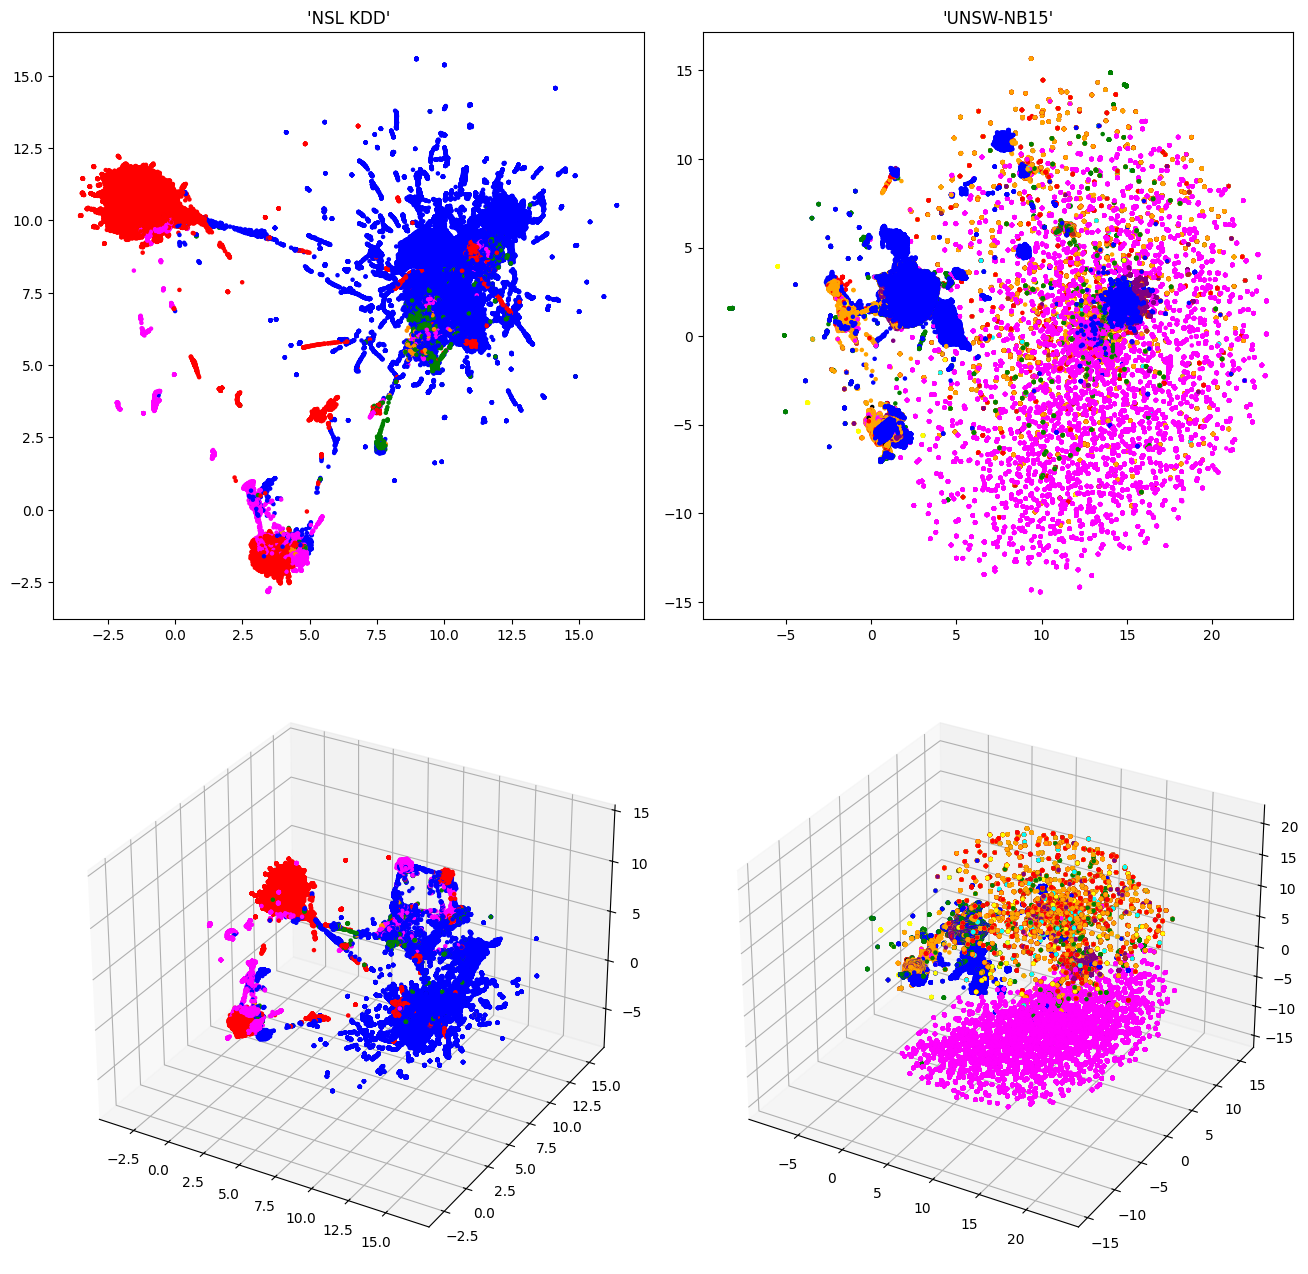

In [12]:
# create subplot mosaic with different keyword arguments
fig, ax = plt.subplot_mosaic("AB;CD",
                             per_subplot_kw={('C', 'D'): {'projection': '3d'}},
                             gridspec_kw={'width_ratios': [2, 2],
                                          'wspace': 0.1, 'hspace': 0.1},
                             figsize=(16, 16))
ax['A'].set_title("'NSL KDD'")
ax['A'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], s=5, c = pd.factorize(nsl_kdd['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax['C'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], nsl_kdd_uMap['umap3'], s=5, c = pd.factorize(nsl_kdd['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax['B'].set_title("'UNSW-NB15'")
ax['B'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], s=5, c = pd.factorize(unsw['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax['D'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], unsw_uMap['umap3'], s=5, c = pd.factorize(unsw['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)

plt.show()


In [13]:
nsl_kdd_kmeans = pd.read_pickle("./nsl_kdd_kmeans_uMap.pkl")
nsl_kdd_single = pd.read_pickle("./nsl_kdd_single_uMap.pkl")
nsl_kdd_avg = pd.read_pickle("./nsl_kdd_avg_uMap.pkl")
nsl_kdd_cmpl = pd.read_pickle("./nsl_kdd_cmpl_uMap.pkl")
nsl_kdd_db = pd.read_pickle("./nsl_kdd_db_uMap.pkl")
nsl_kdd_hdb = pd.read_pickle("./nsl_kdd_hdb_uMap.pkl")
nsl_kdd_opt = pd.read_pickle("./nsl_kdd_opt_uMap.pkl")
%store -r gmm_result
%store -r bir_result

In [14]:
km_ld_levels, km_ld_categories = pd.factorize(nsl_kdd_kmeans['Cluster ID Kmeans'])
km_ld_colors = [plt.cm.tab10(i) for i in km_ld_levels] # using the "tab10" colormap
km_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(km_ld_categories)]

sing_ld_levels, sing_ld_categories = pd.factorize(nsl_kdd_single['Cluster ID Single'])
sing_ld_colors = [plt.cm.tab10(i) for i in sing_ld_levels] # using the "tab10" colormap
sing_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(sing_ld_categories)]

avg_ld_levels, avg_ld_categories = pd.factorize(nsl_kdd_avg['Cluster ID avg'])
avg_ld_colors = [plt.cm.tab10(i) for i in avg_ld_levels] # using the "tab10" colormap
avg_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(avg_ld_categories)]

cmpl_ld_levels, cmpl_ld_categories = pd.factorize(nsl_kdd_cmpl['Cluster ID compl'])
cmpl_ld_colors = [plt.cm.tab10(i) for i in cmpl_ld_levels] # using the "tab10" colormap
cmpl_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(cmpl_ld_categories)]


db_ld_levels, db_ld_categories = pd.factorize(nsl_kdd_db['Cluster ID DBSCAN'])
db_ld_colors = [plt.cm.tab10(i) for i in db_ld_levels] # using the "tab10" colormap
db_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(db_ld_categories)]

hdb_ld_levels, hdb_ld_categories = pd.factorize(nsl_kdd_hdb['Cluster ID HDBSCAN'])
hdb_ld_colors = [plt.cm.tab10(i) for i in hdb_ld_levels] # using the "tab10" colormap
hdb_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(hdb_ld_categories)]

opt_ld_levels, opt_ld_categories = pd.factorize(nsl_kdd_opt['Cluster ID OPTICS'])
opt_ld_colors = [plt.cm.tab10(i) for i in opt_ld_levels] # using the "tab10" colormap
opt_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(opt_ld_categories)]

gmm_ld_levels, gmm_ld_categories = pd.factorize(gmm_result['Cluster ID GMM1'])
gmm_ld_colors = [plt.cm.tab10(i) for i in gmm_ld_levels] # using the "tab10" colormap
gmm_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(gmm_ld_categories)]

bir_ld_levels, bir_ld_categories = pd.factorize(bir_result['Cluster ID BIR'])
bir_ld_colors = [plt.cm.tab10(i) for i in bir_ld_levels] # using the "tab10" colormap
bir_ld_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(bir_ld_categories)]

Text(0.5, 1.0, 'DBSCAN')

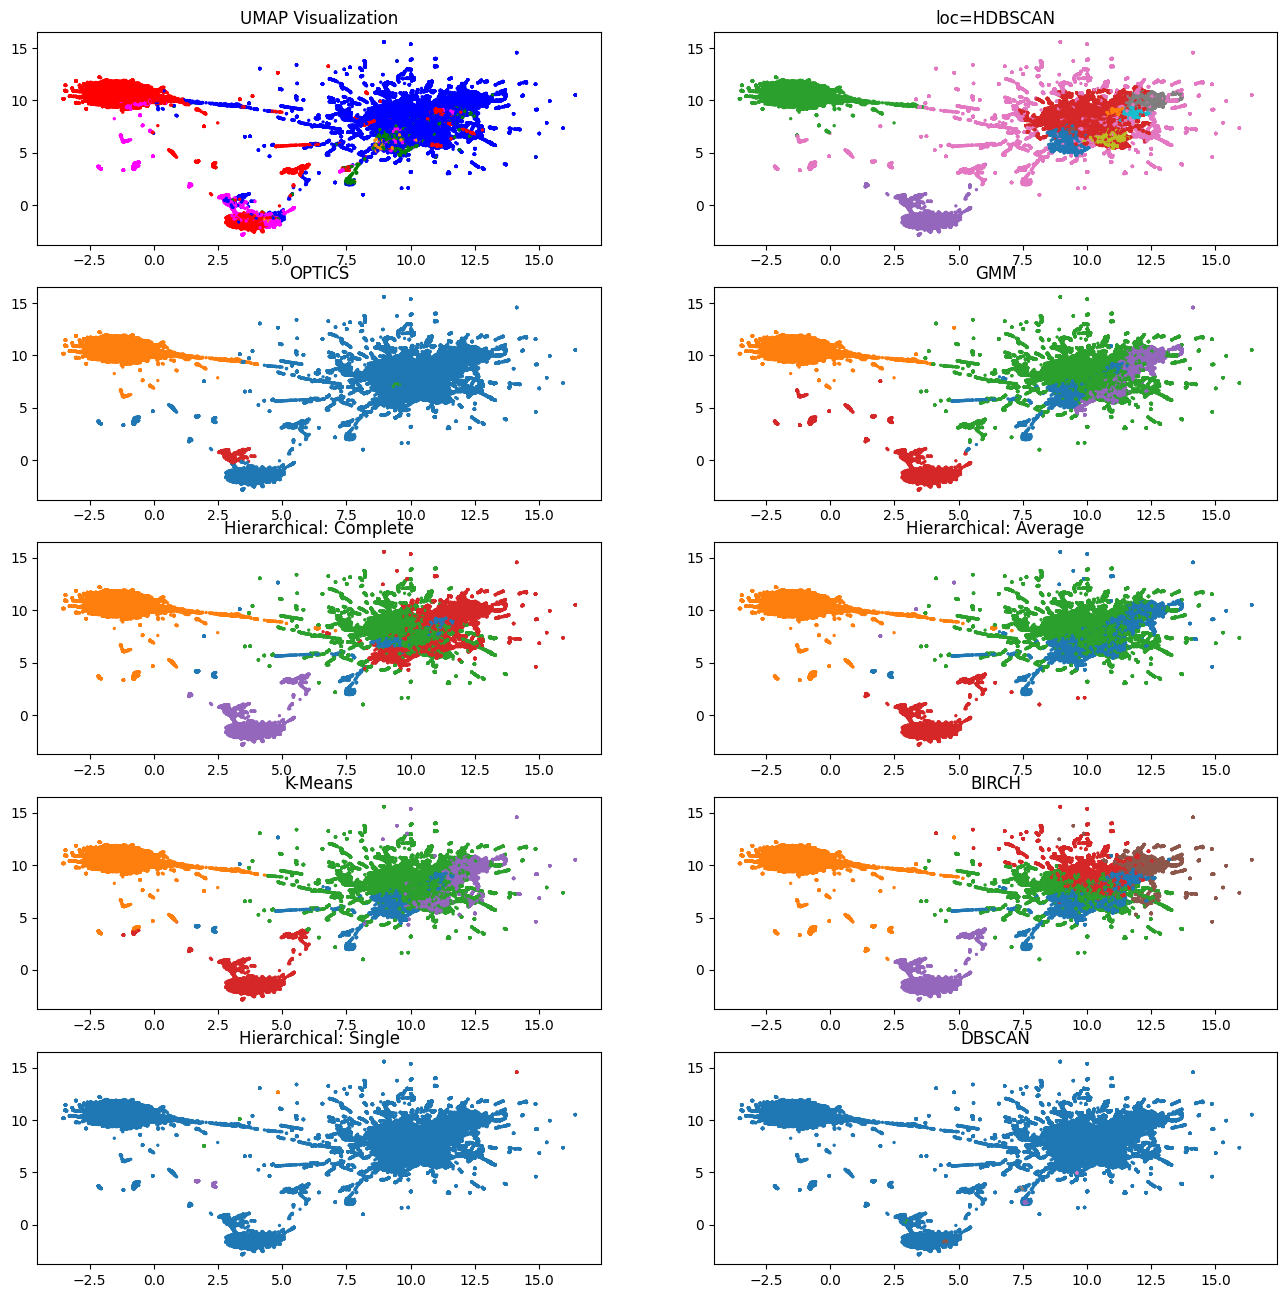

In [15]:

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = plt.subplots(nrows=5, ncols=2, figsize=(16,16))
ax1.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = pd.factorize(nsl_kdd['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax1.set(xlabel=None)
ax1.set_title('UMAP Visualization')
ax2.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = hdb_ld_colors, alpha=1.0)
ax2.set(xlabel=None)
ax2.set_title('HDBSCAN')
ax3.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = opt_ld_colors, alpha=1.0)
ax3.set(xlabel=None)
ax3.set_title('OPTICS')
ax4.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = gmm_ld_colors, alpha=1.0)
ax4.set(xlabel=None)
ax4.set_title('GMM')
ax5.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = cmpl_ld_colors, alpha=1.0)
ax5.set(xlabel=None)
ax5.set_title('Hierarchical: Complete')
ax6.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = avg_ld_colors, alpha=1.0)
ax6.set(xlabel=None)
ax6.set_title('Hierarchical: Average')
ax7.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = km_ld_colors, alpha=1.0)
ax7.set(xlabel=None)
ax7.set_title('K-Means')
ax8.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = bir_ld_colors, alpha=1.0)
ax8.set(xlabel=None)
ax8.set_title('BIRCH')
ax9.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = sing_ld_colors, alpha=1.0)
ax9.set_title('Hierarchical: Single')
ax10.scatter(x=nsl_kdd_uMap['umap1'],y=nsl_kdd_uMap['umap2'], s= 2, c = db_ld_colors, alpha=1.0)
ax10.set_title('DBSCAN')

# produce a legend with the unique colors from the scatter
#legend1 = ax1.legend(handles = handles, loc="upper left", title="Attack Category")
#ax1.add_artist(legend1)

Text(0.5, 0.92, 'DBSCAN')

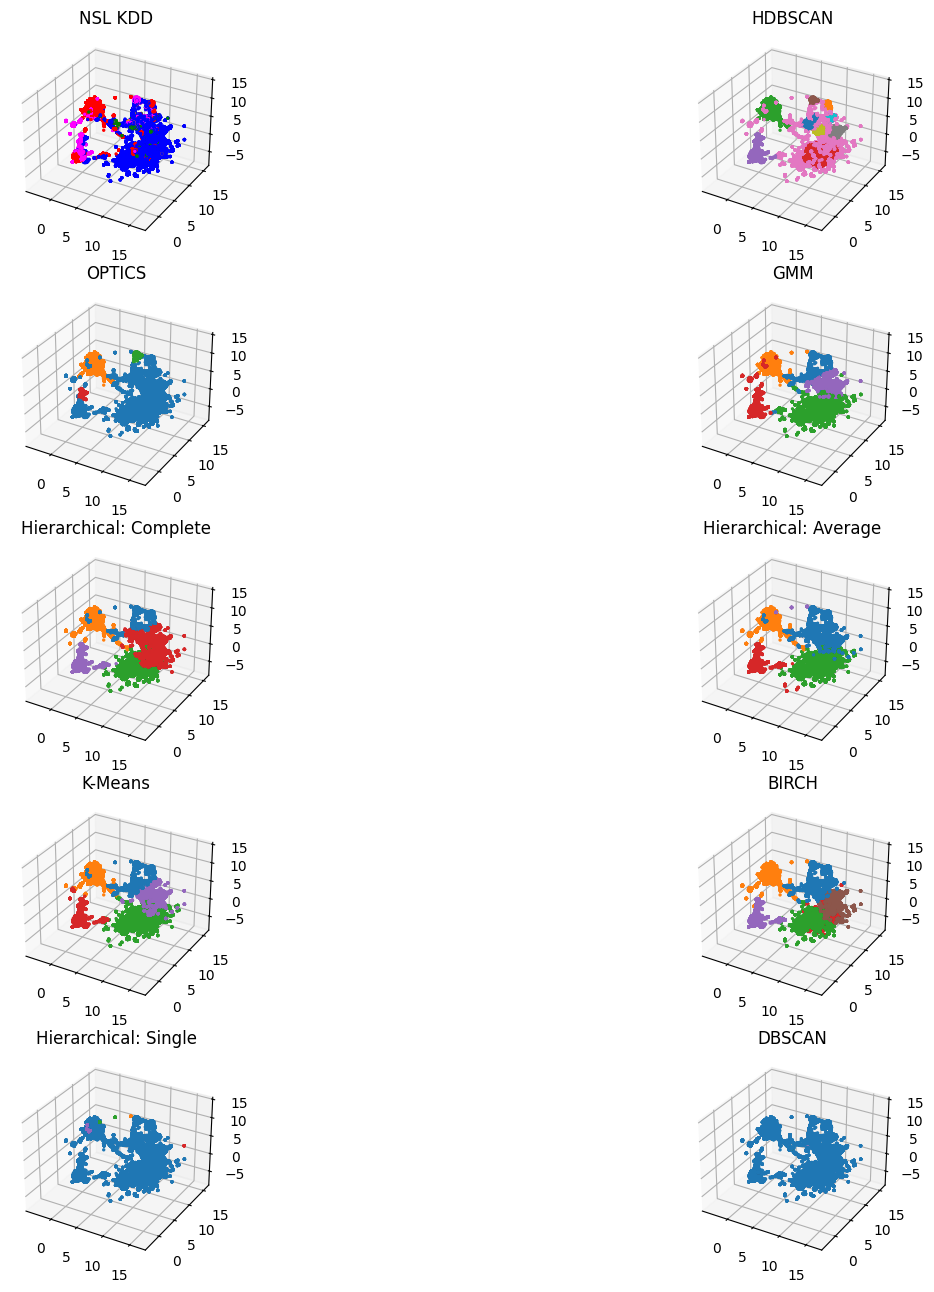

In [16]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = plt.subplots(nrows=5, ncols=2, figsize=(16,16), subplot_kw=dict(projection='3d'))
ax1.scatter(xs  = nsl_kdd_uMap['umap1'], ys = nsl_kdd_uMap['umap2'], zs = nsl_kdd_uMap['umap3'], s= 2, c = pd.factorize(nsl_kdd['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax1.set_title("NSL KDD")
ax2.scatter(xs = nsl_kdd_uMap['umap1'], ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = hdb_ld_colors, alpha=1.0)
ax2.set_title("HDBSCAN")
ax3.scatter(xs = nsl_kdd_uMap['umap1'],ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = opt_ld_colors, alpha=1.0)
ax3.set_title("OPTICS")
ax4.scatter(xs = nsl_kdd_uMap['umap1'],ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = gmm_ld_colors, alpha=1.0)
ax4.set_title("GMM")
ax5.scatter(xs = nsl_kdd_uMap['umap1'],ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = cmpl_ld_colors, alpha=1.0)
ax5.set_title("Hierarchical: Complete")
ax6.scatter(xs = nsl_kdd_uMap['umap1'],ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = avg_ld_colors, alpha=1.0)
ax6.set_title("Hierarchical: Average")
ax7.scatter(xs = nsl_kdd_uMap['umap1'],ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = km_ld_colors, alpha=1.0)
ax7.set_title("K-Means")
ax8.scatter(xs = nsl_kdd_uMap['umap1'],ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = bir_ld_colors, alpha=1.0)
ax8.set_title("BIRCH")
ax9.scatter(xs = nsl_kdd_uMap['umap1'],ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = sing_ld_colors, alpha=1.0)
ax9.set_title("Hierarchical: Single")
ax10.scatter(xs = nsl_kdd_uMap['umap1'],ys = nsl_kdd_uMap['umap2'], zs =  nsl_kdd_uMap['umap3'], s= 2, c = db_ld_colors, alpha=1.0)
ax10.set_title("DBSCAN")

# produce a legend with the unique colors from the scatter
#legend1 = ax6.legend(handles = handles, loc="center", title="Attack Category")
#ax6.add_artist(legend1)

In [17]:
print("NSL KDD Clustering \t\t n_samples %d, \t n_features %d" % (nsl_kdd_uMap.shape[0], nsl_kdd_uMap.shape[1]))
print(85 * '_')
print("\t Internal Evaluation Metrics \t External Evaluation Metrics")
print(85 * '_')
print("\t\t    " f"{'Silh':<10}{'CHI':<10}   {'DBI':<10}{'ARI':<10}{'AMI':<10}{'Compl':<10}")
print(85 * '_')
cluster_evaluation(name = "k-means \t", labels = nsl_kdd['classType'], y_pred = nsl_kdd_kmeans['Cluster ID Kmeans'], data = nsl_kdd_uMap, metric = 'euclidean')
cluster_evaluation(name = "GMM        \t", labels = nsl_kdd['classType'], y_pred = gmm_result['Cluster ID GMM1'], data = nsl_kdd_uMap, metric = 'euclidean')
#cluster_evaluation(name = "Single ]t\t", labels = nsl_kdd['classType'], y_pred = nsl_kdd_single['Cluster ID Single'], data = nsl_kdd_uMap, metric = 'euclidean')
# Single ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
cluster_evaluation(name = "Average\t\t", labels = nsl_kdd['classType'], y_pred = nsl_kdd_avg['Cluster ID avg'], data = nsl_kdd_uMap, metric = 'euclidean')
cluster_evaluation(name = "Complete\t", labels = nsl_kdd['classType'], y_pred = nsl_kdd_cmpl['Cluster ID compl'], data = nsl_kdd_uMap, metric = 'euclidean')
cluster_evaluation(name = "DBSCAN\t\t", labels = nsl_kdd['classType'], y_pred = nsl_kdd_db['Cluster ID DBSCAN'], data = nsl_kdd_uMap, metric = 'euclidean')
cluster_evaluation(name = "HDBSCAN\t\t", labels = nsl_kdd['classType'], y_pred = nsl_kdd_hdb['Cluster ID HDBSCAN'], data = nsl_kdd_uMap, metric = 'euclidean')
cluster_evaluation(name = "OPTICS\t\t", labels = nsl_kdd['classType'], y_pred = nsl_kdd_opt['Cluster ID OPTICS'], data = nsl_kdd_uMap, metric = 'euclidean')
cluster_evaluation(name = "BIRCH  \t\t", labels = nsl_kdd['classType'], y_pred = bir_result['Cluster ID BIR'], data = nsl_kdd_uMap, metric = 'euclidean')
print(85 * '_')
print("silh - silhouette score, CHI - Callinski score, DBI - David Bouldin score")
print("sARI - adjusted rand score, AMI - adjusted mutual information, Compl - completeness_score")
print()
print("Interpretation")
print("silh [-1,1] - -1 mislabelling, 0 cluster overlap, 1 perfect score")
print("CHI no upper bound - higher score, better-defined clusters")
print("DBI - lower score better cluster separation")
print("ARI [0,1] - 1 means identical clusters, predicted and actual are the same")
print("AMI [0,1] - higher values better performance")
print("completeness_score [0,1] - 1 perfect labeling")

NSL KDD Clustering 		 n_samples 148517, 	 n_features 3
_____________________________________________________________________________________
	 Internal Evaluation Metrics 	 External Evaluation Metrics
_____________________________________________________________________________________
		    Silh      CHI          DBI       ARI       AMI       Compl     
_____________________________________________________________________________________
k-means 	    0.627  361536.639     0.653     0.359     0.390     0.323
GMM        	    0.620  339042.620     0.670     0.359     0.384     0.318
Average		    0.692  242307.475     0.587     0.364     0.402     0.355
Complete	    0.564  247649.877     0.721     0.346     0.381     0.315
DBSCAN		   -0.111    1042.106     1.027     0.041     0.107     0.278
HDBSCAN		    0.622  117506.749     1.206     0.303     0.390     0.293
OPTICS		    0.269   41870.398     0.722     0.432     0.430     0.501
BIRCH  		    0.560  290185.196     1.014     0.251     0.37

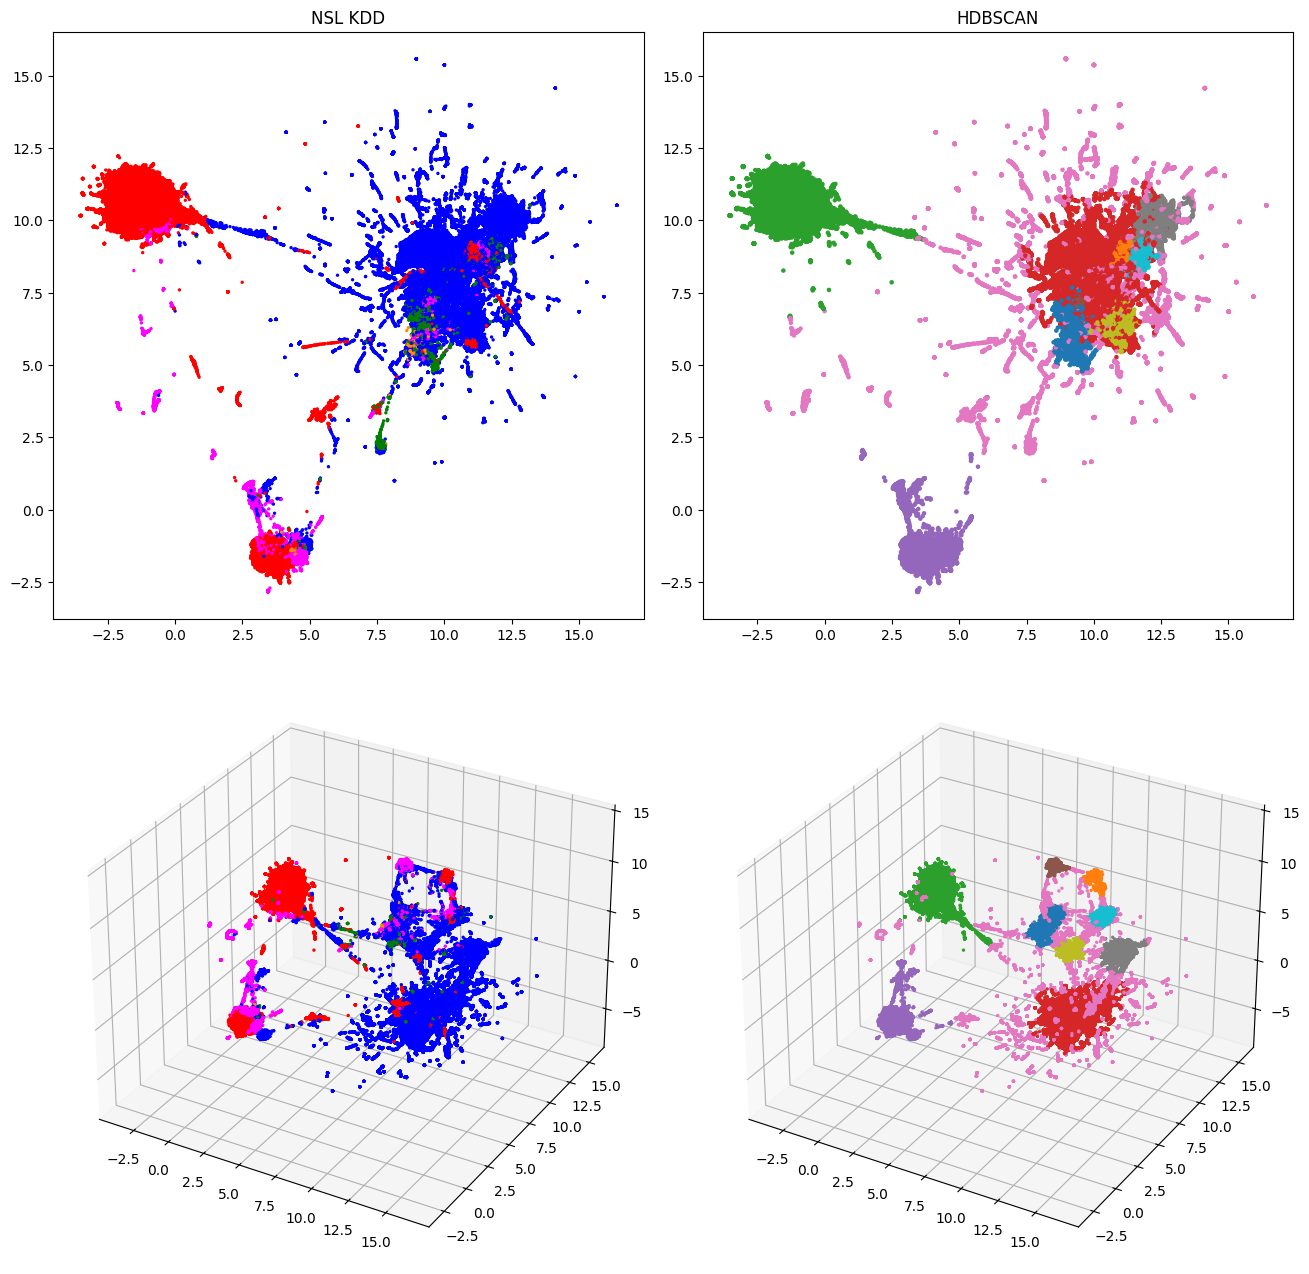

In [18]:
# create subplot mosaic with different keyword arguments
fig, ax = plt.subplot_mosaic("AB;CD",
                             per_subplot_kw={('C', 'D'): {'projection': '3d'}},
                             gridspec_kw={'width_ratios': [2, 2],
                                          'wspace': 0.1, 'hspace': 0.1},
                             figsize=(16, 16))
ax['A'].set_title("NSL KDD")
ax['A'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], s=2, c = pd.factorize(nsl_kdd['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax['C'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], nsl_kdd_uMap['umap3'], s=2, c = pd.factorize(nsl_kdd['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax['B'].set_title("HDBSCAN")
ax['B'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], s=5, c = hdb_ld_colors, alpha=1.0)
ax['D'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], nsl_kdd_uMap['umap3'], s=2, c = hdb_ld_colors, alpha=1.0)

plt.show()

## UNSW-NB15

In [19]:
unsw_kmeans = pd.read_pickle("./unsw_kmeans_uMap.pkl")
unsw_single = pd.read_pickle("./unsw_single_uMap.pkl")
#unsw_avg = pd.read_pickle("./unsw_avg_uMap.pkl")
#unsw_cmpl = pd.read_pickle("./unsw_cmpl_uMap.pkl")
unsw_db = pd.read_pickle("./unsw_db_uMap.pkl")
#unsw_hdb = pd.read_pickle("./unsw_hdb_uMap.pkl")
#unsw_opt = pd.read_pickle("./unsw_opt_uMap.pkl")
%store -r unsw_hdb
%store -r unsw_gmm
%store -r unsw_bir

In [20]:
km_unsw_levels, km_unsw_categories = pd.factorize(unsw_kmeans['Cluster ID Kmeans'])
km_unsw_colors = [plt.cm.tab10(i) for i in km_unsw_levels] # using the "tab10" colormap
km_unsw_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(km_unsw_categories)]

sing_unsw_levels, sing_unsw_categories = pd.factorize(unsw_single['Cluster ID Single'])
sing_unsw_colors = [plt.cm.tab10(i) for i in sing_unsw_levels] # using the "tab10" colormap
sing_unsw_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(sing_unsw_categories)]

gmm_unsw_levels, gmm_unsw_categories = pd.factorize(unsw_gmm['Cluster ID GMM'])
gmm_unsw_colors = [plt.cm.tab10(i) for i in gmm_unsw_levels] # using the "tab10" colormap
gmm_unsw_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(gmm_unsw_categories)]

db_unsw_levels, db_unsw_categories = pd.factorize(unsw_db['Cluster ID DBSCAN'])
db_unsw_colors = [plt.cm.tab10(i) for i in db_unsw_levels] # using the "tab10" colormap
db_unsw_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(db_unsw_categories)]

hdb_unsw_levels, hdb_unsw_categories = pd.factorize(unsw_hdb['Cluster ID HDBSCAN'])
hdb_unsw_colors = [plt.cm.tab10(i) for i in hdb_unsw_levels] # using the "tab10" colormap
hdb_unsw_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(hdb_unsw_categories)]

bir_unsw_levels, bir_unsw_categories = pd.factorize(unsw_bir['Cluster ID Birch'])
bir_unsw_colors = [plt.cm.tab10(i) for i in bir_unsw_levels] # using the "tab10" colormap
bir_unsw_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(bir_unsw_categories)]

Text(0.5, 0.92, 'DBSCAN')

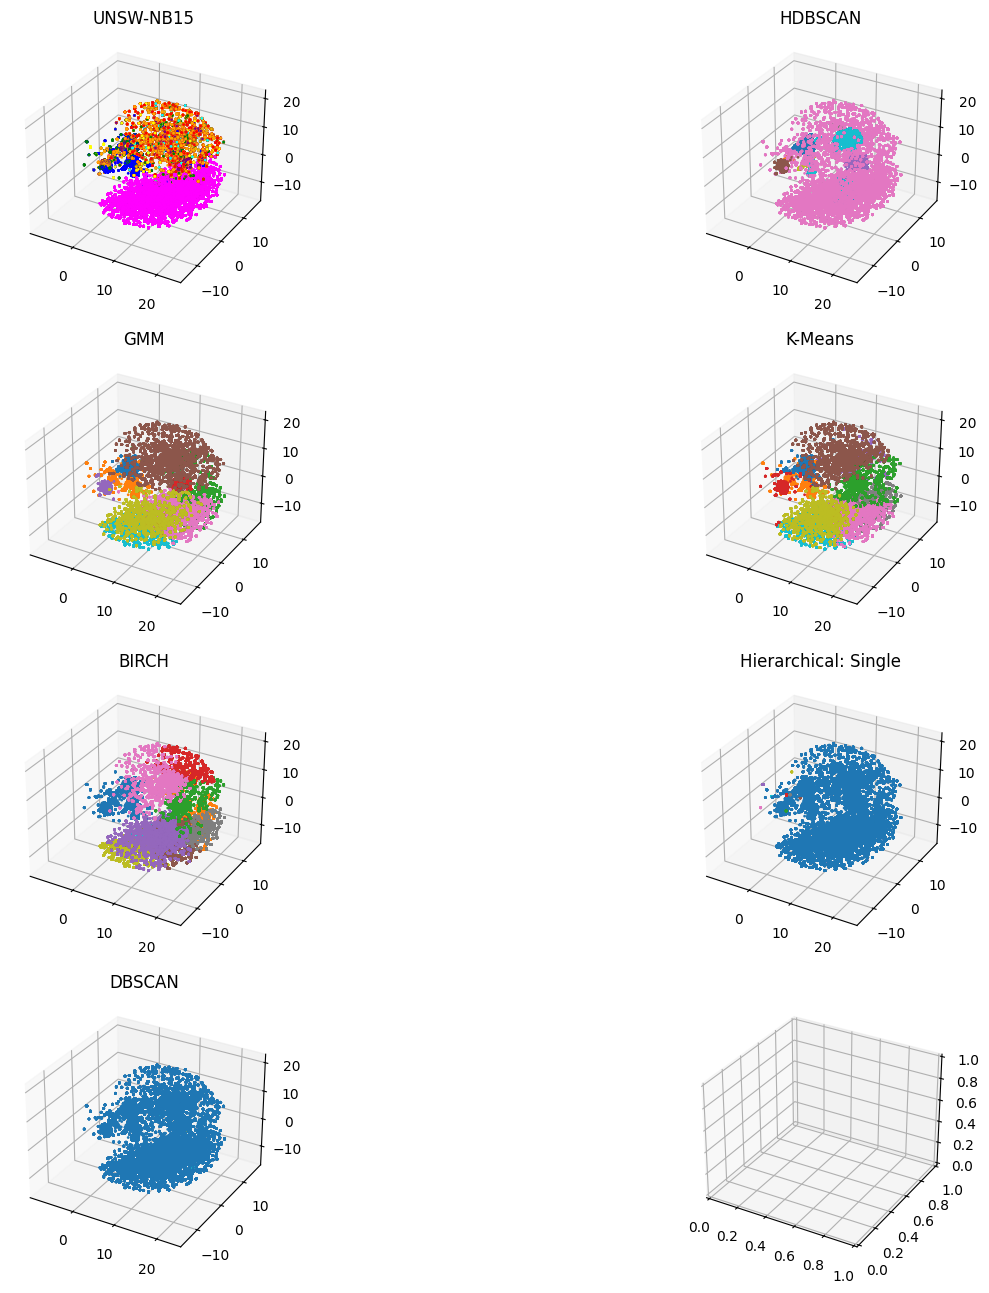

In [21]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(nrows=4, ncols=2, figsize=(16,16), subplot_kw=dict(projection='3d'))
ax1.scatter(xs  = unsw_uMap['umap1'], ys = unsw_uMap['umap2'], zs = unsw_uMap['umap3'], s= 1, c = pd.factorize(unsw['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax1.set_title("UNSW-NB15")
ax2.scatter(xs = unsw_uMap['umap1'], ys = unsw_uMap['umap2'], zs =  unsw_uMap['umap3'], s= 1, c = hdb_unsw_colors, alpha=1.0)
ax2.set_title("HDBSCAN")
ax3.scatter(xs = unsw_uMap['umap1'],ys = unsw_uMap['umap2'], zs =  unsw_uMap['umap3'], s= 1, c = gmm_unsw_colors, alpha=1.0)
ax3.set_title("GMM")
ax4.scatter(xs = unsw_uMap['umap1'],ys = unsw_uMap['umap2'], zs =  unsw_uMap['umap3'], s= 1, c = km_unsw_colors, alpha=1.0)
ax4.set_title("K-Means")
ax5.scatter(xs = unsw_uMap['umap1'],ys = unsw_uMap['umap2'], zs =  unsw_uMap['umap3'], s= 1, c = bir_unsw_colors, alpha=1.0)
ax5.set_title("BIRCH")
ax6.scatter(xs = unsw_uMap['umap1'],ys = unsw_uMap['umap2'], zs =  unsw_uMap['umap3'], s= 1, c = sing_unsw_colors, alpha=1.0)
ax6.set_title("Hierarchical: Single")
ax7.scatter(xs = unsw_uMap['umap1'],ys = unsw_uMap['umap2'], zs =  unsw_uMap['umap3'], s= 1, c = db_unsw_colors, alpha=1.0)
ax7.set_title("DBSCAN")

# produce a legend with the unique colors from the scatter
#legend1 = ax6.legend(handles = handles, loc="center", title="Attack Category")
#ax6.add_artist(legend1)

In [22]:
print("UNSW-NB15 Clustering \t\t n_samples %d, \t n_features %d" % (unsw_uMap.shape[0], unsw_uMap.shape[1]))
print(85 * '_')
print("\t Internal Evaluation Metrics \t External Evaluation Metrics")
print(85 * '_')
print("\t\t    " f"{'Silh':<10}{'CHI':<10}   {'DBI':<10}{'ARI':<10}{'AMI':<10}{'Compl':<10}")
print(85 * '_')
cluster_evaluation(name = "k-means \t", labels = unsw['attack_cat'], y_pred = unsw_kmeans['Cluster ID Kmeans'], data = unsw_uMap, metric = 'euclidean')
cluster_evaluation(name = "Single\t\t", labels = unsw['attack_cat'], y_pred = unsw_single['Cluster ID Single'], data = unsw_uMap, metric = 'euclidean')
cluster_evaluation(name = "GMM        \t", labels = unsw['attack_cat'], y_pred = unsw_gmm['Cluster ID GMM'], data = unsw_uMap, metric = 'euclidean')
cluster_evaluation(name = "DBSCAN \t\t", labels = unsw['attack_cat'], y_pred = unsw_db['Cluster ID DBSCAN'], data = unsw_uMap, metric = 'euclidean')
cluster_evaluation(name = "HDBSCAN \t", labels = unsw['attack_cat'], y_pred = unsw_hdb['Cluster ID HDBSCAN'], data = unsw_uMap, metric = 'euclidean')
cluster_evaluation(name = "BIRCH \t\t", labels = unsw['attack_cat'], y_pred = unsw_bir['Cluster ID Birch'], data = unsw_uMap, metric = 'euclidean')
#cluster_evaluation(name = "Spectral", labels = spectral, y_pred = unsw['attack_cat'], data = unsw_uMap, metric = 'euclidean')

#cluster_evaluation(name = "SNN \t\t", labels = unsw['attack_cat'], y_pred = avg['Cluster ID avg'], data = unsw_uMap, metric = 'euclidean')
print(85 * '_')
print("silh - silhouette score, CHI - Callinski score, DBI - David Bouldin score")
print("sARI - adjusted rand score, AMI - adjusted mutual information, Compl - completeness_score")
print()
print("Interpretation")
print("silh [-1,1] - -1 mislabelling, 0 cluster overlap, 1 perfect score")
print("CHI no upper bound - higher score, better-defined clusters")
print("DBI - lower score better cluster separation")
print("ARI [0,1] - 1 means identical clusters, predicted and actual are the same")
print("AMI [0,1] - higher values better performance")
print("completeness_score [0,1] - 1 perfect labeling")

UNSW-NB15 Clustering 		 n_samples 257673, 	 n_features 3
_____________________________________________________________________________________
	 Internal Evaluation Metrics 	 External Evaluation Metrics
_____________________________________________________________________________________
		    Silh      CHI          DBI       ARI       AMI       Compl     
_____________________________________________________________________________________
k-means 	    0.470  169100.817     0.887     0.191     0.355     0.314
Single		   -0.102     196.730     0.905    -0.006     0.013     0.178
GMM        	    0.438  150617.444     0.940     0.201     0.365     0.323
DBSCAN 		   -0.364     508.856     0.913    -0.002     0.029     0.188
HDBSCAN 	    0.280   21893.812     1.378     0.198     0.309     0.269
BIRCH 		    0.373   98620.247     1.025     0.213     0.339     0.330
_____________________________________________________________________________________
silh - silhouette score, CHI - Callinski s

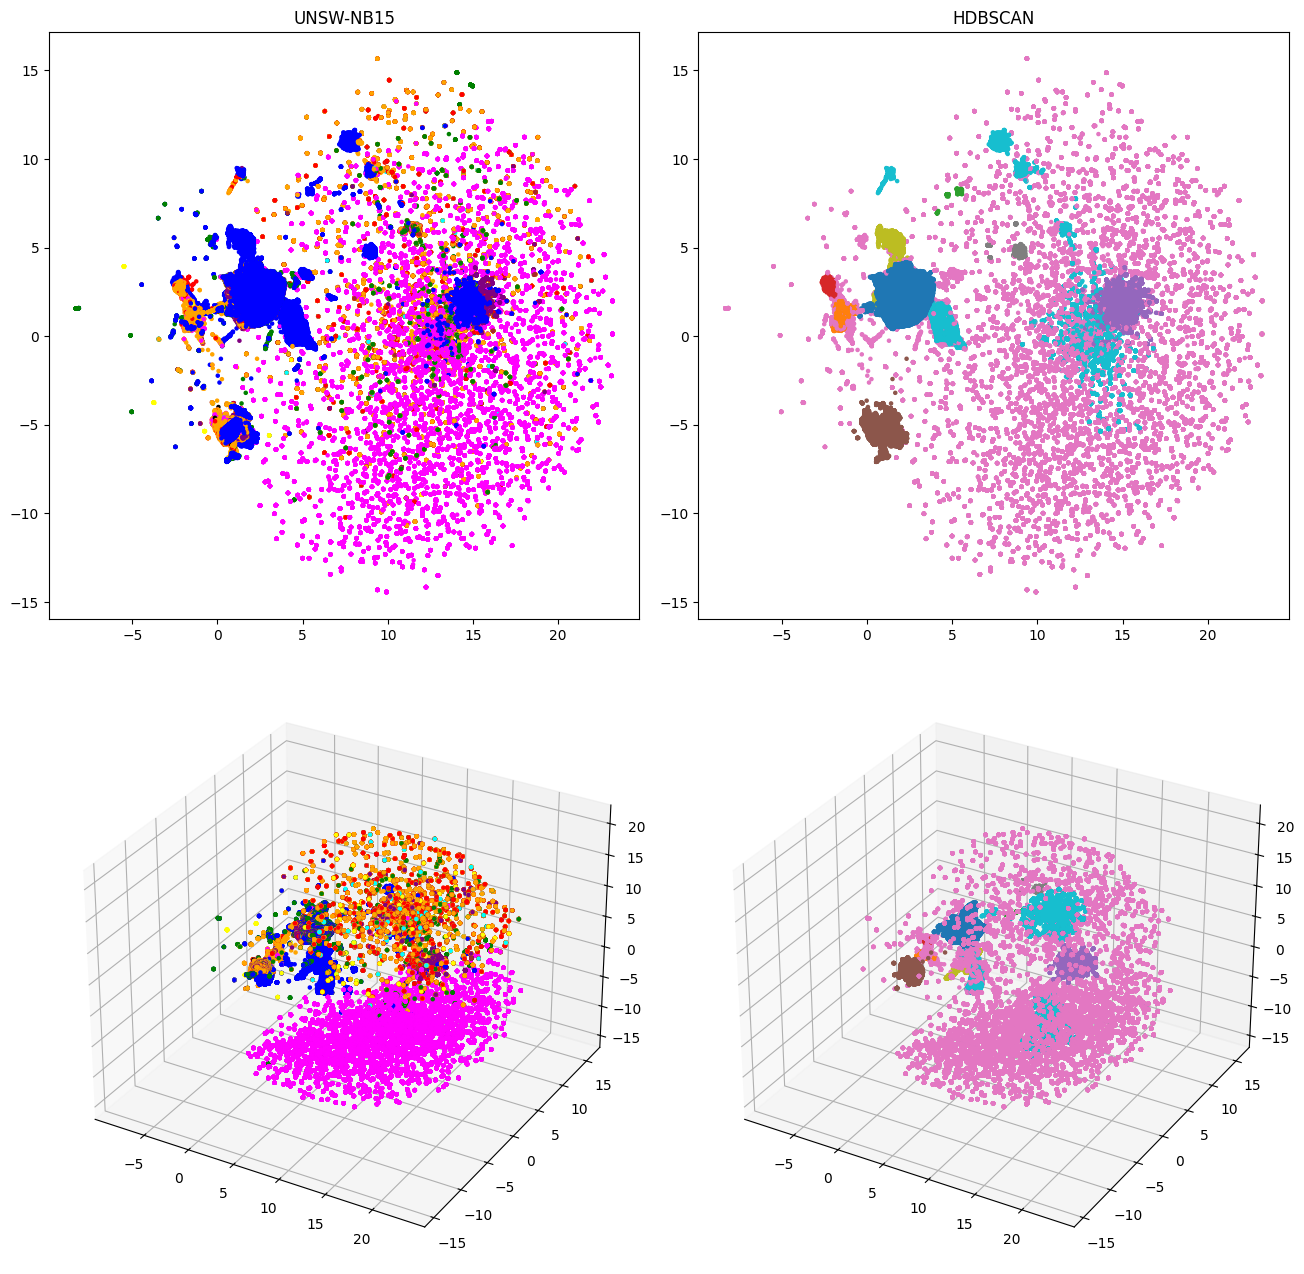

In [23]:
# create subplot mosaic with different keyword arguments
fig, ax = plt.subplot_mosaic("AB;CD",
                             per_subplot_kw={('C', 'D'): {'projection': '3d'}},
                             gridspec_kw={'width_ratios': [2, 2],
                                          'wspace': 0.1, 'hspace': 0.1},
                             figsize=(16, 16))
ax['A'].set_title("UNSW-NB15")
ax['A'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], s=5, c = pd.factorize(unsw['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax['C'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], unsw_uMap['umap3'], s=5, c = pd.factorize(unsw['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax['B'].set_title("HDBSCAN")
ax['B'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], s=5, c =hdb_unsw_colors, alpha=1.0)
ax['D'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], unsw_uMap['umap3'], s=5, c =hdb_unsw_colors, alpha=1.0)

# produce a legend with the unique colors from the scatter
#legend1 = ax['B'].legend(handles = unsw_handles, loc="best", title="Attack Category")
#ax['B'].add_artist(legend1)

plt.show()




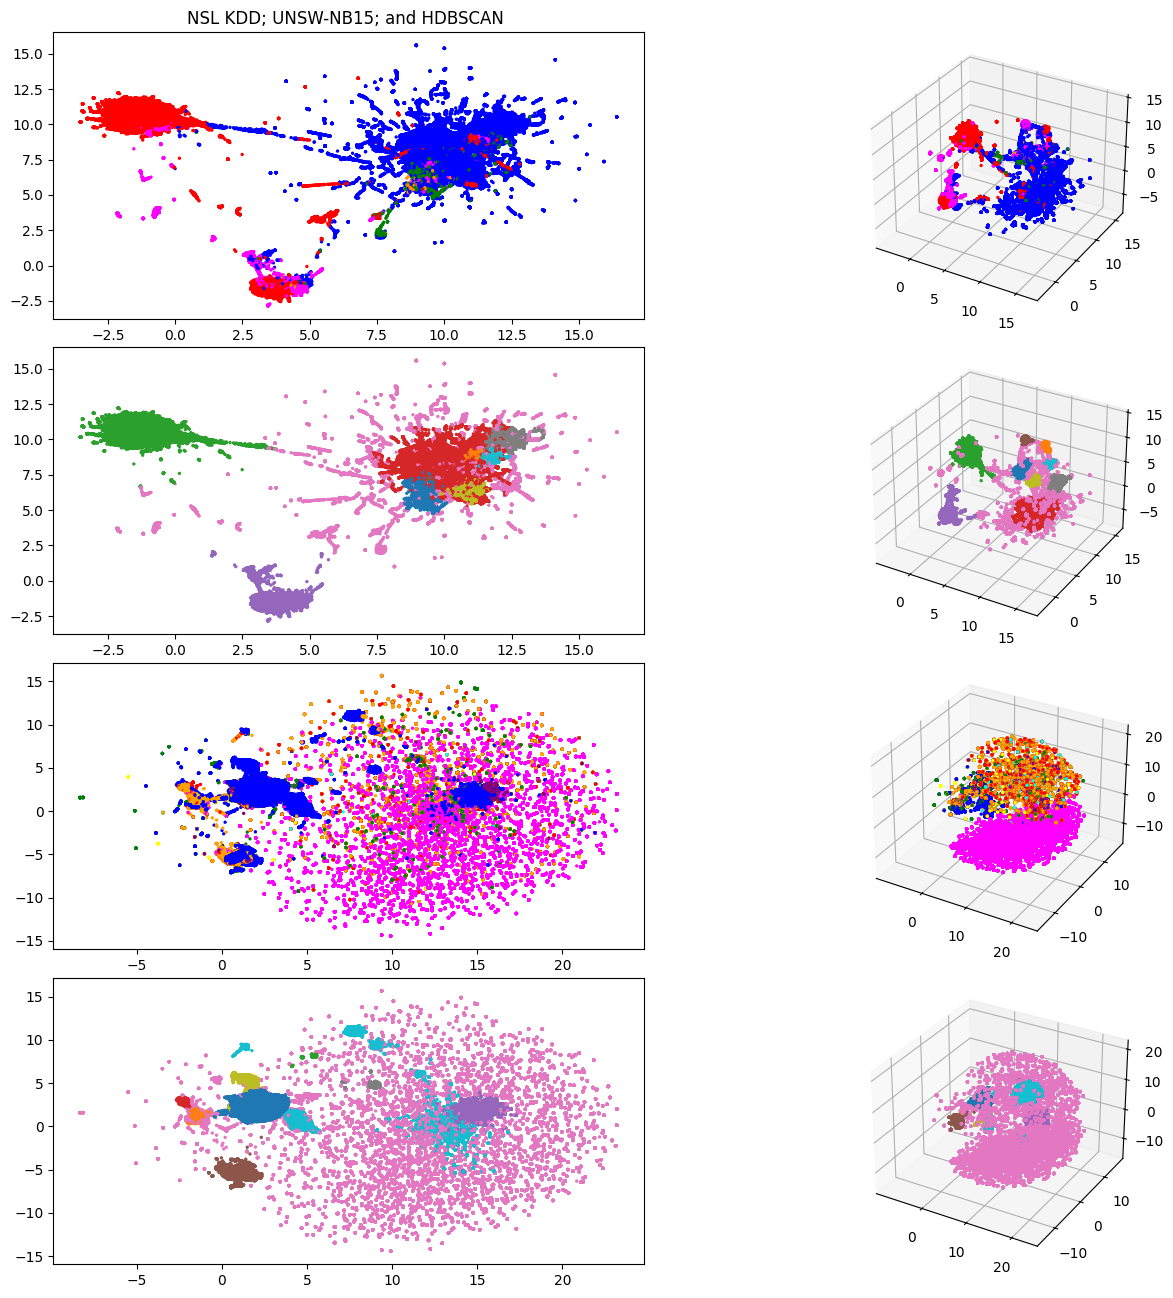

In [24]:
# create subplot mosaic with different keyword arguments
fig, ax = plt.subplot_mosaic("AB;CD;EF;GH",
                             per_subplot_kw={('B', 'D', 'F', 'H'): {'projection': '3d'}},
                             gridspec_kw={'width_ratios': [2, 2],
                                          'wspace': 0.1, 'hspace': 0.1},
                             figsize=(16, 16))
ax['A'].set_title("NSL KDD; UNSW-NB15; and HDBSCAN ")
ax['A'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], s=2, c = pd.factorize(nsl_kdd['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax['B'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], nsl_kdd_uMap['umap3'], s=2, c = pd.factorize(nsl_kdd['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
#ax['B'].set_title("'HDBSCAN'")
ax['C'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], s=2, c = hdb_ld_colors, alpha=1.0)
ax['D'].scatter(nsl_kdd_uMap['umap1'], nsl_kdd_uMap['umap2'], nsl_kdd_uMap['umap3'], s=2, c = hdb_ld_colors, alpha=1.0)
ax['E'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], s=2, c = pd.factorize(unsw['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax['F'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], unsw_uMap['umap3'], s=2, c = pd.factorize(unsw['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax['G'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], s=2, c =hdb_unsw_colors, alpha=1.0)
ax['H'].scatter(unsw_uMap['umap1'], unsw_uMap['umap2'], unsw_uMap['umap3'], s=2, c =hdb_unsw_colors, alpha=1.0)
#legend1 = ax['B'].legend(handles = nsl_kdd_handles, loc="upper left", title="Attack Category")
#ax['B'].add_artist(legend1)
#legend2 = ax['F'].legend(handles = unsw_handles, loc="upper left", title="Attack Category")
#ax['F'].add_artist(legend2)



## Dimensionality Reduction with dataset size of 75,000

### NSL-KDD 

In [25]:
nsl_kdd75 = pd.read_pickle("./nsl_kdd75.pkl")
X_raw75 = pd.read_pickle("./nsl_kdd_X_raw75.pkl")
X_OHE75 = pd.read_pickle("./nsl_kdd_X_OHE75.pkl")
nsl_kdd_pca75 = pd.read_pickle("./nsl_kdd_pca75.pkl") 
nsl_kdd_uMap75 = pd.read_pickle("./nsl_kdd_uMap75.pkl") 
nsl_kdd_famd75 = pd.read_pickle("./nsl_kdd_famd75.pkl")
nsl_kdd_tsne75 = pd.read_pickle("./nsl_kdd_tsne75.pkl") 
nsl_kdd_isomap75 = pd.read_pickle("./nsl_kdd_isomap75.pkl")

In [26]:
print('Dimensions of the NSL KDD:', nsl_kdd75.shape)
print("Class proportions:\n", nsl_kdd75['classType'].value_counts(normalize = True))

Dimensions of the NSL KDD: (75000, 43)
Class proportions:
 classType
normal    0.518827
dos       0.359467
probe     0.094787
r2l       0.025227
u2r       0.001693
Name: proportion, dtype: float64


In [27]:
print('Dimensions of the NSL KDD:', nsl_kdd75.shape)
print('Dimensions of the PCA:', nsl_kdd_pca75.shape)
print('Dimensions of the UMAP:', nsl_kdd_uMap75.shape)
print('Dimensions of the FAMD:', nsl_kdd_famd75.shape)
print('Dimensions of the TSNE:', nsl_kdd_tsne75.shape)
print('Dimensions of the ISOMAP:', nsl_kdd_isomap75.shape)

Dimensions of the NSL KDD: (75000, 43)
Dimensions of the PCA: (75000, 3)
Dimensions of the UMAP: (75000, 3)
Dimensions of the FAMD: (75000, 3)
Dimensions of the TSNE: (75000, 3)
Dimensions of the ISOMAP: (75000, 3)


### NSL-KDD 2D Outputs

Text(0.5, 1.0, 'PCA')

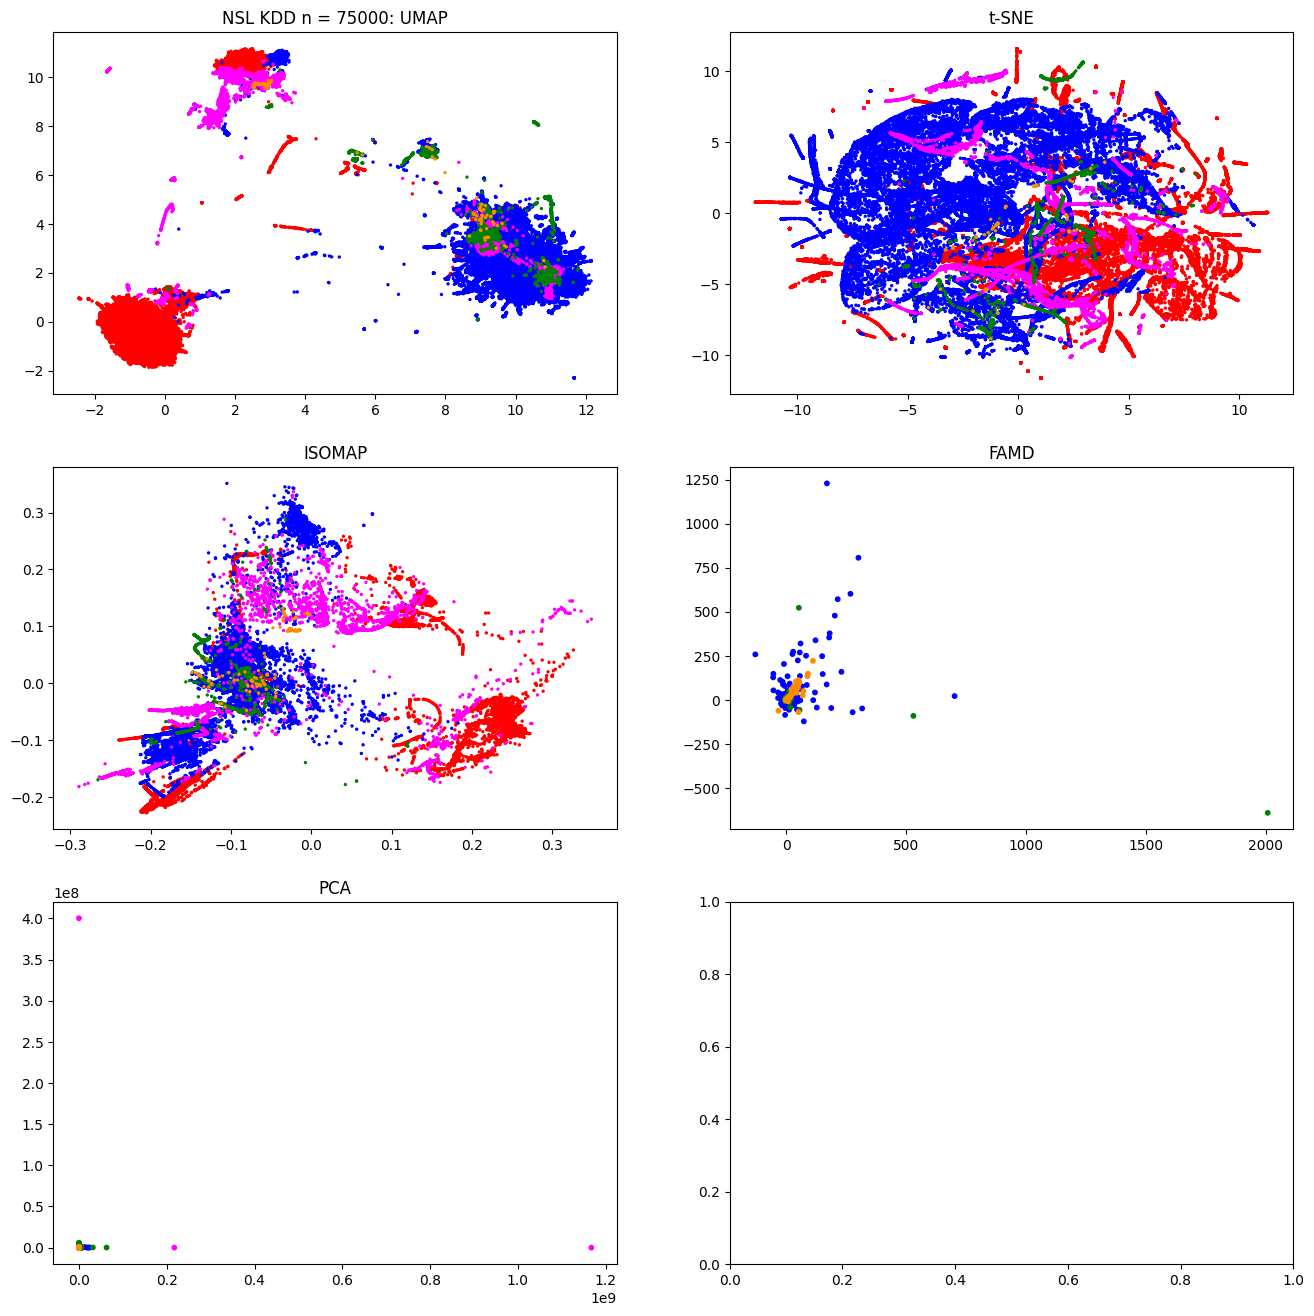

In [28]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
ax1.scatter(x=nsl_kdd_uMap75['umap1'], y=nsl_kdd_uMap75['umap2'], s= 2, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax1.set(xlabel=None)
ax1.set_title('NSL KDD n = 75000: UMAP')
ax2.scatter(x=nsl_kdd_tsne75['tsne1'],y=nsl_kdd_tsne75['tsne2'], s= 2, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax2.set(xlabel=None)
ax2.set_title('t-SNE')
ax3.scatter(x=nsl_kdd_isomap75['iso1'],y=nsl_kdd_isomap75['iso2'], s= 2, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax3.set(xlabel=None)
ax3.set_title('ISOMAP')
ax4.scatter(x = nsl_kdd_famd75[0], y = nsl_kdd_famd75[1], s=10, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1)
ax4.set(xlabel=None)
ax4.set_title('FAMD')
ax5.scatter(x=nsl_kdd_pca75['pca1'],y=nsl_kdd_pca75['pca2'], s= 10, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax5.set_title('PCA')

# produce a legend with the unique colors from the scatter
#legend1 = ax6.legend(handles = handles, loc="center", title="Attack Category")
#ax6.add_artist(legend1)

Text(0.5, 0.92, 'PCA')

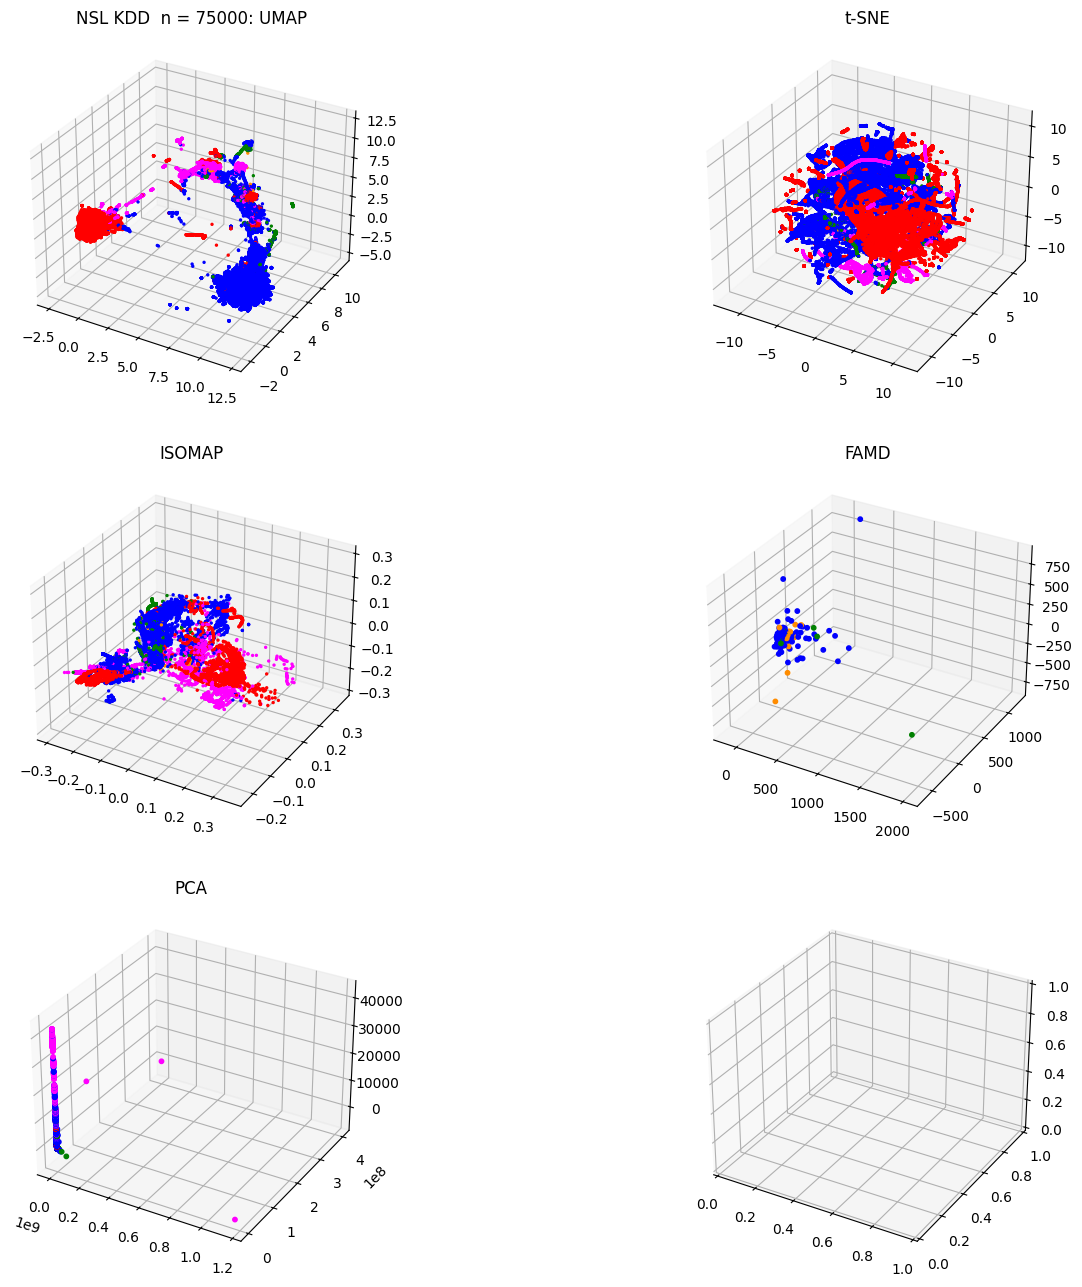

In [29]:

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(nrows=3, ncols=2, figsize=(16,16), subplot_kw=dict(projection='3d'))
ax1.scatter(xs=nsl_kdd_uMap75['umap1'],ys=nsl_kdd_uMap75['umap2'], zs= nsl_kdd_uMap75['umap3'], s= 2, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax1.set_title('NSL KDD  n = 75000: UMAP')
ax2.scatter(xs=nsl_kdd_tsne75['tsne1'],ys=nsl_kdd_tsne75['tsne2'], zs= nsl_kdd_tsne75['tsne3'], s= 2, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax2.set_title('t-SNE')
ax3.scatter(xs=nsl_kdd_isomap75['iso1'],ys=nsl_kdd_isomap75['iso2'], zs= nsl_kdd_isomap75['iso3'], s= 2, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax3.set_title('ISOMAP')
ax4.scatter(xs=nsl_kdd_famd75[0],ys=nsl_kdd_famd75[1], zs= nsl_kdd_famd75[2], s= 10, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax4.set_title('FAMD')
ax5.scatter(xs=nsl_kdd_pca75['pca1'],ys=nsl_kdd_pca75['pca2'], zs= nsl_kdd_pca75['pca3'], s= 10, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax5.set_title('PCA')

# produce a legend with the unique colors from the scatter
#legend1 = ax6.legend(handles = handles, loc="center", title="Attack Category")
#ax6.add_artist(legend1)

### UNSW-NB15 

In [30]:
unsw75 = pd.read_pickle("./unsw75.pkl")
unsw_X_raw75 = pd.read_pickle("./unsw_X_raw75.pkl")
unsw_X_OHE75 = pd.read_pickle("./unsw_X_OHE75.pkl")
unsw_pca75 = pd.read_pickle("./unsw_pca75.pkl") 
unsw_uMap75 = pd.read_pickle("./unsw_uMap75.pkl") 
unsw_famd75 = pd.read_pickle("./unsw_famd75.pkl")
unsw_tsne75 = pd.read_pickle("./unsw_tsne75.pkl") 
unsw_isomap75 = pd.read_pickle("./unsw_isomap75.pkl")

In [31]:
print('Dimensions of the NSL KDD:', unsw75.shape)
print("Class proportions:\n", unsw75['attack_cat'].value_counts(normalize = True))

Dimensions of the NSL KDD: (75000, 45)
Class proportions:
 attack_cat
Normal            0.360920
Generic           0.228467
Exploits          0.172800
Fuzzers           0.094093
DoS               0.063467
Reconnaissance    0.054280
Analysis          0.010387
Backdoor          0.009040
Shellcode         0.005867
Worms             0.000680
Name: proportion, dtype: float64


In [32]:
print('Dimensions of the UNSW-NB15:', unsw75.shape)
print('Dimensions of the PCA:', unsw_pca75.shape)
print('Dimensions of the UMAP:', unsw_uMap75.shape)
print('Dimensions of the FAMD:', unsw_famd75.shape)
print('Dimensions of the TSNE:', unsw_tsne75.shape)
print('Dimensions of the ISOMAP:', unsw_isomap75.shape)

Dimensions of the UNSW-NB15: (75000, 45)
Dimensions of the PCA: (75000, 3)
Dimensions of the UMAP: (75000, 3)
Dimensions of the FAMD: (75000, 3)
Dimensions of the TSNE: (75000, 3)
Dimensions of the ISOMAP: (75000, 3)


### UNSW-NB15 2D Outputs

Text(0.5, 1.0, 'PCA')

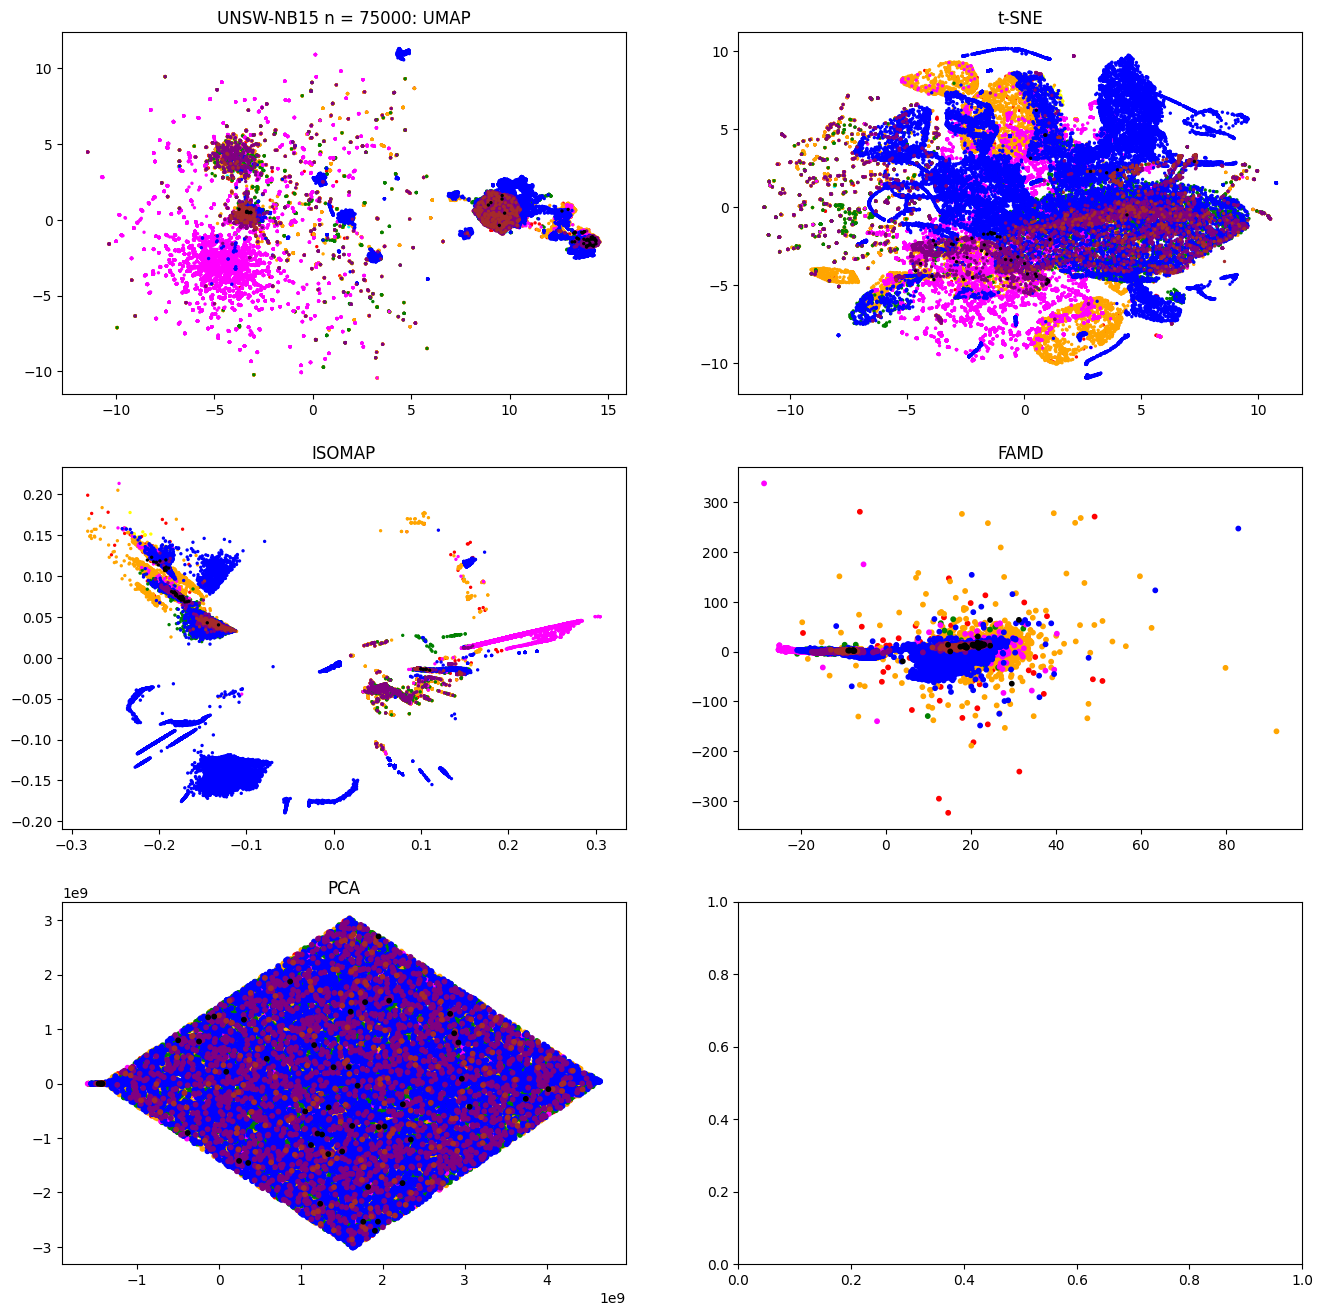

In [33]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
ax1.scatter(x=unsw_uMap75['umap1'], y=unsw_uMap75['umap2'], s= 2, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax1.set(xlabel=None)
ax1.set_title('UNSW-NB15 n = 75000: UMAP')
ax2.scatter(x=unsw_tsne75['tsne1'],y=unsw_tsne75['tsne2'], s= 2, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax2.set(xlabel=None)
ax2.set_title('t-SNE')
ax3.scatter(x=unsw_isomap75['iso1'],y=unsw_isomap75['iso2'], s= 2, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax3.set(xlabel=None)
ax3.set_title('ISOMAP')
ax4.scatter(x = unsw_famd75[0], y = unsw_famd75[1], s=10, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1)
ax4.set(xlabel=None)
ax4.set_title('FAMD')
ax5.scatter(x=unsw_pca75['pca1'],y=unsw_pca75['pca2'], s= 10, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax5.set_title('PCA')

# produce a legend with the unique colors from the scatter
#legend1 = ax6.legend(handles = handles, loc="center", title="Attack Category")
#ax6.add_artist(legend1)

### UNSW-NB15 3D Outputs

Text(0.5, 0.92, 'PCA')

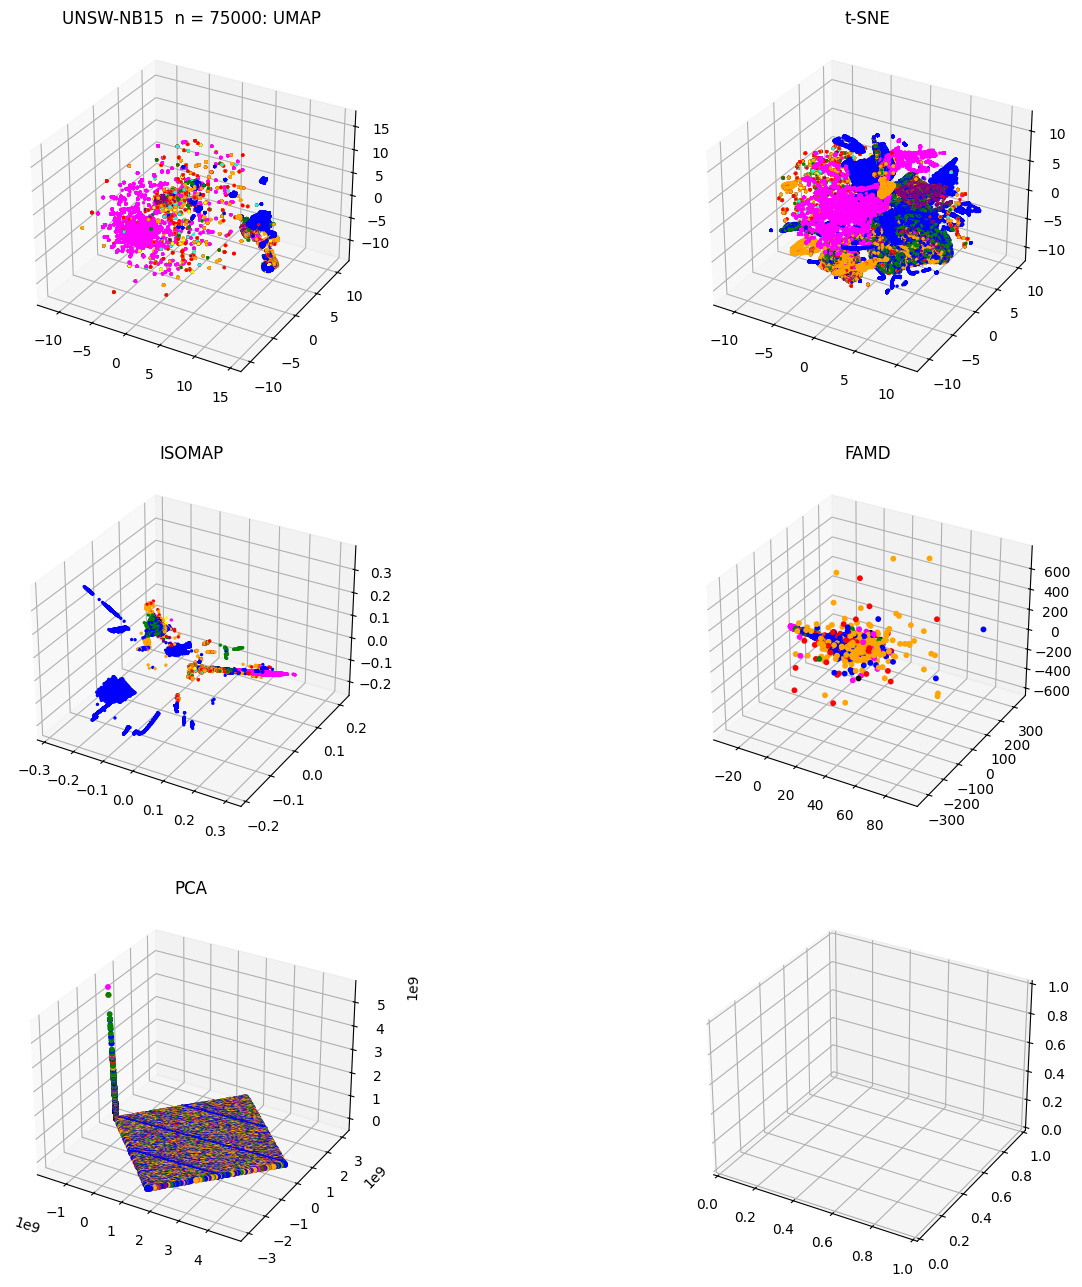

In [34]:

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(nrows=3, ncols=2, figsize=(16,16), subplot_kw=dict(projection='3d'))
ax1.scatter(xs=unsw_uMap75['umap1'],ys=unsw_uMap75['umap2'], zs= unsw_uMap75['umap3'], s= 2, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax1.set_title('UNSW-NB15  n = 75000: UMAP')
ax2.scatter(xs=unsw_tsne75['tsne1'],ys=unsw_tsne75['tsne2'], zs= unsw_tsne75['tsne3'], s= 2, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax2.set_title('t-SNE')
ax3.scatter(xs=unsw_isomap75['iso1'],ys=unsw_isomap75['iso2'], zs= unsw_isomap75['iso3'], s= 2, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax3.set_title('ISOMAP')
ax4.scatter(xs=unsw_famd75[0],ys=unsw_famd75[1], zs= unsw_famd75[2], s= 10, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax4.set_title('FAMD')
ax5.scatter(xs=unsw_pca75['pca1'],ys=unsw_pca75['pca2'], zs= unsw_pca75['pca3'], s= 10, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax5.set_title('PCA')

# produce a legend with the unique colors from the scatter
#legend1 = ax6.legend(handles = handles, loc="center", title="Attack Category")
#ax6.add_artist(legend1)

#### Dimentionality Reduction Methods Runtimes

Text(0.5, 0, 'seconds')

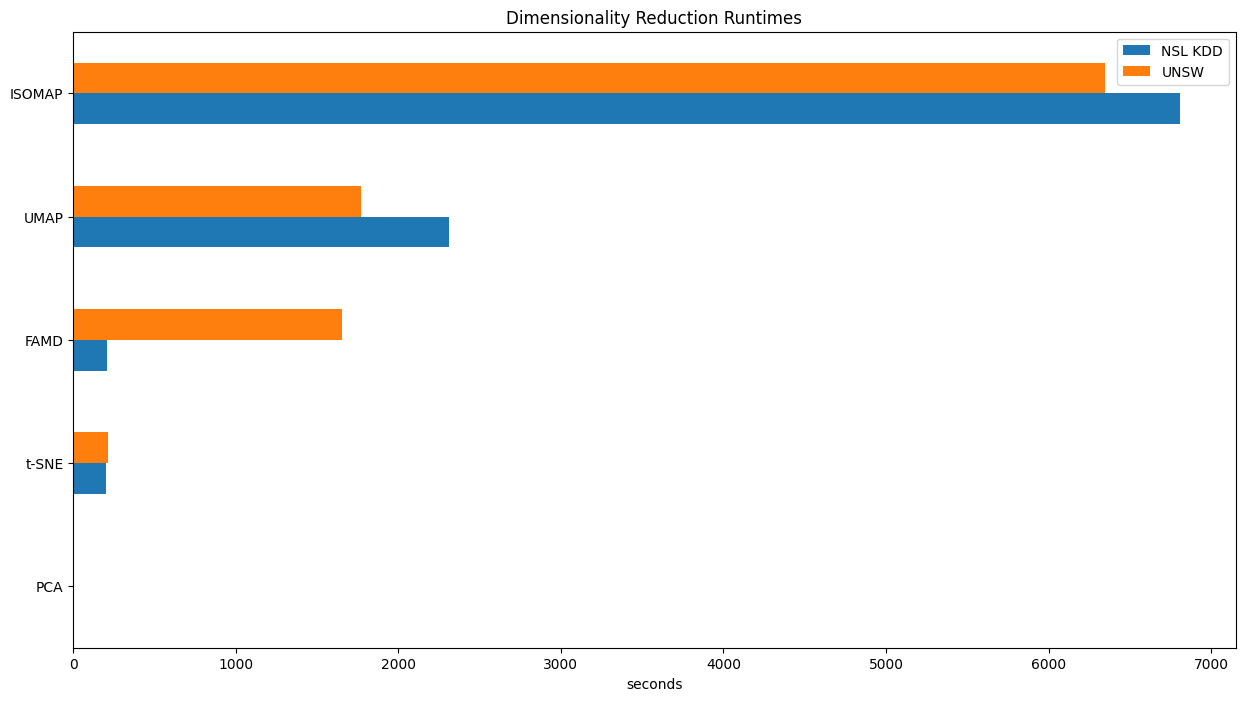

In [46]:
plotdata = pd.DataFrame({

    "NSL KDD":[0.8765, 204, 208, 2314, 6811],

    "UNSW":[0.5105, 214, 1656, 1770, 6347]},

    index=["PCA", "t-SNE", "FAMD", "UMAP", "ISOMAP"])

plotdata.plot(kind="barh",figsize=(15, 8))

plt.title("Dimensionality Reduction Runtimes")

plt.xlabel("seconds")

## Cluster Analysis with dataset size of 75,000

In [35]:
nsl_kdd_kmeans_uMap75 = pd.read_pickle("./nsl_kdd_kmeans_uMap75.pkl")
nsl_kdd_gmm_uMap75 = pd.read_pickle("./nsl_kdd_gmm_uMap75.pkl")
nsl_kdd_single_uMap75 = pd.read_pickle("./nsl_kdd_single_uMap75.pkl")
nsl_kdd_avg_uMap75 = pd.read_pickle("./nsl_kdd_avg_uMap75.pkl")
nsl_kdd_cmpl_uMap75 = pd.read_pickle("./nsl_kdd_cmpl_uMap75.pkl")
nsl_kdd_spec_uMap75 = pd.read_pickle("./nsl_kdd_spec_uMap75.pkl")
nsl_kdd_bir_uMap75 = pd.read_pickle("./nsl_kdd_bir_uMap75.pkl")
nsl_kdd_db_uMap75 = pd.read_pickle("./nsl_kdd_db_uMap75.pkl")
nsl_kdd_opt_uMap75 = pd.read_pickle("./nsl_kdd_opt_uMap75.pkl")
nsl_kdd_hdb_uMap75 = pd.read_pickle("./nsl_kdd_hdb_uMap75.pkl")
#nsl_kdd_opt = pd.read_pickle("./nsl_kdd_opt.pkl")

### NSL-KDD 2D Outputs

In [36]:
km_75u_levels, km_75u_categories = pd.factorize(nsl_kdd_kmeans_uMap75['Cluster ID Kmeans'])
km_75u_colors = [plt.cm.tab10(i) for i in km_75u_levels] # using the "tab10" colormap
km_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(km_75u_categories)]

gmm_75u_levels, gmm_75u_categories = pd.factorize(nsl_kdd_gmm_uMap75['Cluster ID GMM'])
gmm_75u_colors = [plt.cm.tab10(i) for i in gmm_75u_levels] # using the "tab10" colormap
gmm_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(gmm_75u_categories)]

sing_75u_levels, sing_75u_categories = pd.factorize(nsl_kdd_single_uMap75['Cluster ID Single'])
sing_75u_colors = [plt.cm.tab10(i) for i in sing_75u_levels] # using the "tab10" colormap
sing_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(sing_75u_categories)]

avg_75u_levels, avg_75u_categories = pd.factorize(nsl_kdd_avg_uMap75['Cluster ID avg'])
avg_75u_colors = [plt.cm.tab10(i) for i in avg_75u_levels] # using the "tab10" colormap
avg_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(avg_75u_categories)]

cmpl_75u_levels, cmpl_75u_categories = pd.factorize(nsl_kdd_cmpl_uMap75['Cluster ID compl'])
cmpl_75u_colors = [plt.cm.tab10(i) for i in cmpl_75u_levels] # using the "tab10" colormap
cmpl_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(cmpl_75u_categories)]

spec_75u_levels, spec_75u_categories = pd.factorize(nsl_kdd_spec_uMap75['Cluster ID SPC'])
spec_75u_colors = [plt.cm.tab10(i) for i in spec_75u_levels] # using the "tab10" colormap
spec_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(spec_75u_categories)]

bir_75u_levels, bir_75u_categories = pd.factorize(nsl_kdd_bir_uMap75['Cluster ID Birch'])
bir_75u_colors = [plt.cm.tab10(i) for i in bir_75u_levels] # using the "tab10" colormap
bir_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(bir_75u_categories)]

db_75u_levels, db_75u_categories = pd.factorize(nsl_kdd_db_uMap75['Cluster ID DBSCAN'])
db_75u_colors = [plt.cm.tab10(i) for i in db_75u_levels] # using the "tab10" colormap
db_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(db_75u_categories)]

opt_75u_levels, opt_75u_categories = pd.factorize(nsl_kdd_opt_uMap75['Cluster ID OPTICS'])
opt_75u_colors = [plt.cm.tab10(i) for i in opt_75u_levels] # using the "tab10" colormap
opt_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(opt_75u_categories)]

hdb_75u_levels, hdb_75u_categories = pd.factorize(nsl_kdd_hdb_uMap75['Cluster ID HDBSCAN'])
hdb_75u_colors = [plt.cm.tab10(i) for i in hdb_75u_levels] # using the "tab10" colormap
hdb_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(hdb_75u_categories)]



Text(0.5, 1.0, 'Spectral Clustering')

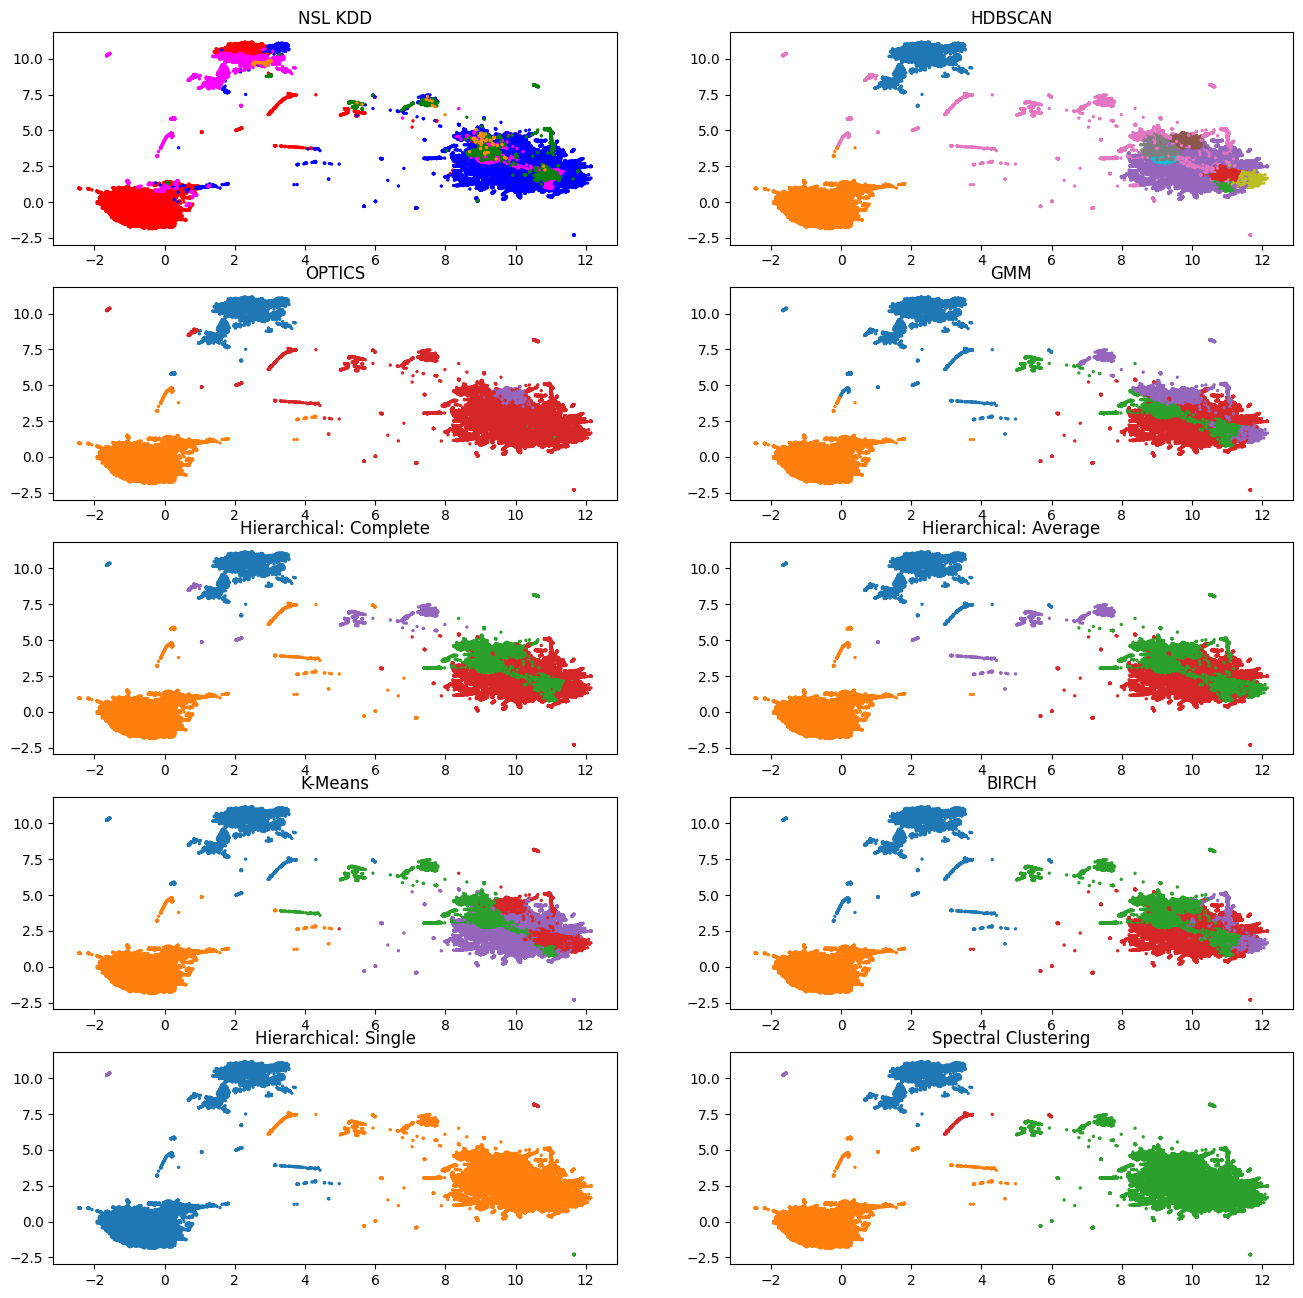

In [38]:

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = plt.subplots(nrows=5, ncols=2, figsize=(16,16))
ax1.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax1.set_title("NSL KDD")
ax1.set(xlabel=None)
ax2.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = hdb_75u_colors, alpha=1.0)
ax2.set_title("HDBSCAN")
ax2.set(xlabel=None)
ax3.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = opt_75u_colors, alpha=1.0)
ax3.set_title("OPTICS")
ax3.set(xlabel=None)
ax4.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = gmm_75u_colors, alpha=1.0)
ax4.set_title("GMM")
ax4.set(xlabel=None)
ax5.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = cmpl_75u_colors, alpha=1.0)
ax5.set_title("Hierarchical: Complete")
ax5.set(xlabel=None)
ax6.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = avg_75u_colors, alpha=1.0)
ax6.set_title("Hierarchical: Average")
ax6.set(xlabel=None)
ax7.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = km_75u_colors, alpha=1.0)
ax7.set_title("K-Means")
ax7.set(xlabel=None)
ax8.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = bir_75u_colors, alpha=1.0)
ax8.set_title("BIRCH")
ax8.set(xlabel=None)
ax9.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = sing_75u_colors, alpha=1.0)
ax9.set_title("Hierarchical: Single")
ax10.scatter(x  = nsl_kdd_uMap75['umap1'], y = nsl_kdd_uMap75['umap2'], s= 2, c = spec_75u_colors, alpha=1.0)
ax10.set_title("Spectral Clustering")

# produce a legend with the unique colors from the scatter
#legend1 = ax1.legend(handles = handles, loc="upper left", title="Attack Category")
#ax1.add_artist(legend1)

### NSL-KDD 3D Outputs

Text(0.5, 0.92, 'Spectral')

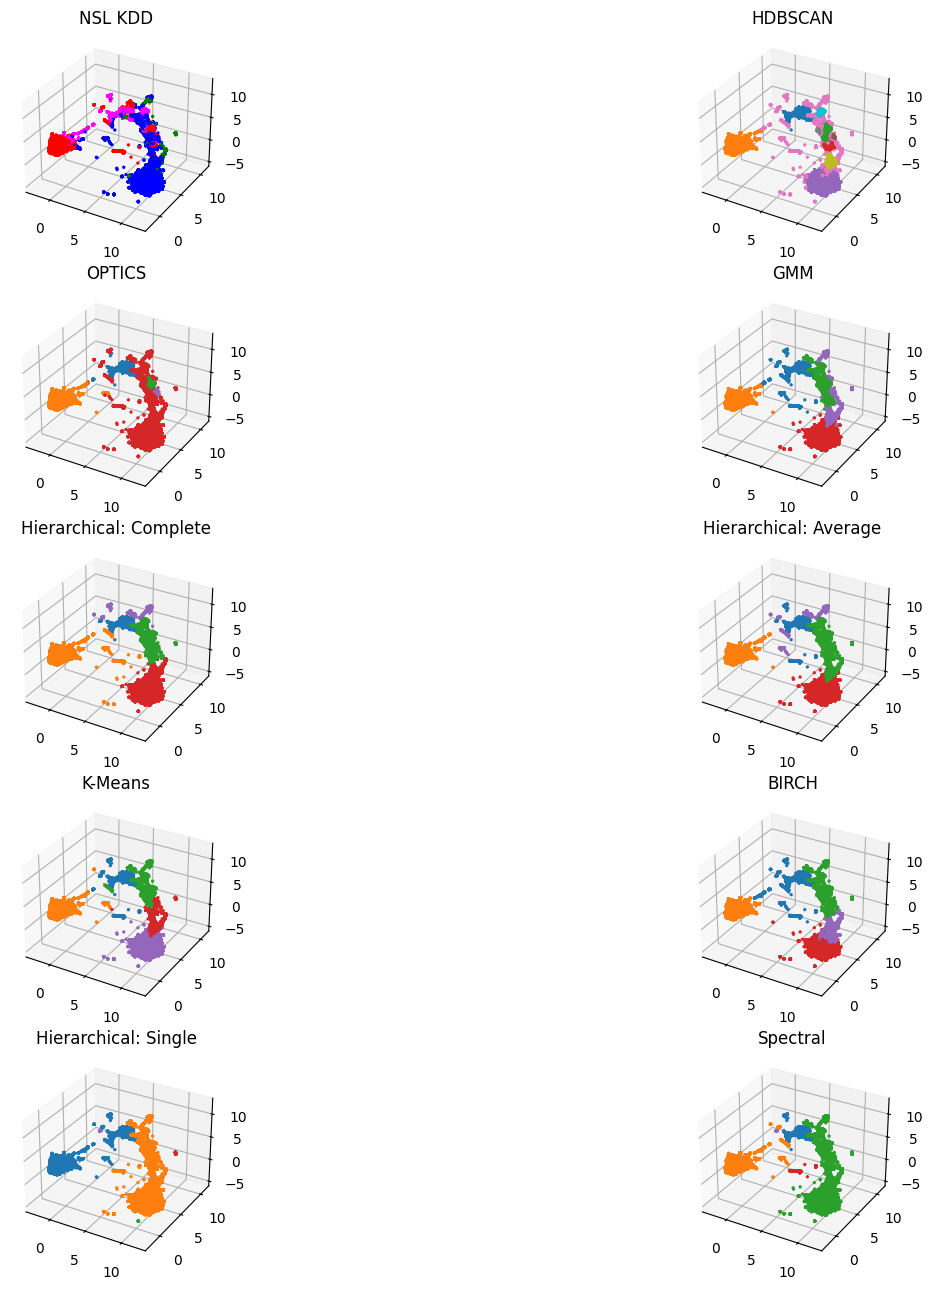

In [39]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = plt.subplots(nrows=5, ncols=2, figsize=(16,16), subplot_kw=dict(projection='3d'))
ax1.scatter(xs  = nsl_kdd_uMap75['umap1'], ys = nsl_kdd_uMap75['umap2'], zs = nsl_kdd_uMap75['umap3'], s= 2, c = pd.factorize(nsl_kdd75['classType'], sort = True)[0], cmap = nsl_kdd_cmap, alpha=1.0)
ax1.set_title("NSL KDD")
ax2.scatter(xs = nsl_kdd_uMap75['umap1'], ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = hdb_75u_colors, alpha=1.0)
ax2.set_title("HDBSCAN")
ax3.scatter(xs = nsl_kdd_uMap75['umap1'],ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = opt_75u_colors, alpha=1.0)
ax3.set_title("OPTICS")
ax4.scatter(xs = nsl_kdd_uMap75['umap1'],ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = gmm_75u_colors, alpha=1.0)
ax4.set_title("GMM")
ax5.scatter(xs = nsl_kdd_uMap75['umap1'],ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = cmpl_75u_colors, alpha=1.0)
ax5.set_title("Hierarchical: Complete")
ax6.scatter(xs = nsl_kdd_uMap75['umap1'],ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = avg_75u_colors, alpha=1.0)
ax6.set_title("Hierarchical: Average")
ax7.scatter(xs = nsl_kdd_uMap75['umap1'],ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = km_75u_colors, alpha=1.0)
ax7.set_title("K-Means")
ax8.scatter(xs = nsl_kdd_uMap75['umap1'],ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = bir_75u_colors, alpha=1.0)
ax8.set_title("BIRCH")
ax9.scatter(xs = nsl_kdd_uMap75['umap1'],ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = sing_75u_colors, alpha=1.0)
ax9.set_title("Hierarchical: Single")
ax10.scatter(xs = nsl_kdd_uMap75['umap1'],ys = nsl_kdd_uMap75['umap2'], zs =  nsl_kdd_uMap75['umap3'], s= 2, c = spec_75u_colors, alpha=1.0)
ax10.set_title("Spectral")

# produce a legend with the unique colors from the scatter
#legend1 = ax6.legend(handles = handles, loc="center", title="Attack Category")
#ax6.add_artist(legend1)

### Cluster Evaluation

In [40]:
print("NSL KDD Clustering \t\t n_samples %d, \t n_features %d" % (nsl_kdd_uMap75.shape[0], nsl_kdd_uMap75.shape[1]))
print(85 * '_')
print("\t Internal Evaluation Metrics \t External Evaluation Metrics")
print(85 * '_')
print("\t\t    " f"{'Silh':<10}{'CHI':<10}   {'DBI':<10}{'ARI':<10}{'AMI':<10}{'Compl':<10}")
print(85 * '_')
cluster_evaluation(name = "k-means \t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_kmeans_uMap75['Cluster ID Kmeans'], data = nsl_kdd_uMap75, metric = 'euclidean')
cluster_evaluation(name = "GMM        \t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_gmm_uMap75['Cluster ID GMM'], data = nsl_kdd_uMap75, metric = 'euclidean')
cluster_evaluation(name = "Single \t\t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_single_uMap75['Cluster ID Single'], data = nsl_kdd_uMap75, metric = 'euclidean')
# Single ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
cluster_evaluation(name = "Average\t\t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_avg_uMap75['Cluster ID avg'], data = nsl_kdd_uMap75, metric = 'euclidean')
cluster_evaluation(name = "Complete\t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_cmpl_uMap75['Cluster ID compl'], data = nsl_kdd_uMap75, metric = 'euclidean')
cluster_evaluation(name = "Spectral\t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_spec_uMap75['Cluster ID SPC'], data = nsl_kdd_uMap75, metric = 'euclidean')
#cluster_evaluation(name = "DBSCAN\t\t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_db_uMap75['Cluster ID DBSCAN'], data = nsl_kdd_uMap75, metric = 'euclidean')
cluster_evaluation(name = "OPTICS\t\t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_opt_uMap75['Cluster ID OPTICS'], data = nsl_kdd_uMap75, metric = 'euclidean')
cluster_evaluation(name = "HDBSCAN\t\t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_hdb_uMap75['Cluster ID HDBSCAN'], data = nsl_kdd_uMap75, metric = 'euclidean')
cluster_evaluation(name = "BIRCH  \t\t", labels = nsl_kdd75['classType'], y_pred = nsl_kdd_bir_uMap75['Cluster ID Birch'], data = nsl_kdd_uMap75, metric = 'euclidean')
print(85 * '_')
print("silh - silhouette score, CHI - Callinski score, DBI - David Bouldin score")
print("sARI - adjusted rand score, AMI - adjusted mutual information, Compl - completeness_score")
print()
print("Interpretation")
print("silh [-1,1] - -1 mislabelling, 0 cluster overlap, 1 perfect score")
print("CHI no upper bound - higher score, better-defined clusters")
print("DBI - lower score better cluster separation")
print("ARI [0,1] - 1 means identical clusters, predicted and actual are the same")
print("AMI [0,1] - higher values better performance")
print("completeness_score [0,1] - 1 perfect labeling")

NSL KDD Clustering 		 n_samples 75000, 	 n_features 3
_____________________________________________________________________________________
	 Internal Evaluation Metrics 	 External Evaluation Metrics
_____________________________________________________________________________________
		    Silh      CHI          DBI       ARI       AMI       Compl     
_____________________________________________________________________________________
k-means 	    0.648  261364.887     0.596     0.369     0.389     0.323
GMM        	    0.628  209052.965     0.774     0.376     0.415     0.344
Single 		    0.499   14520.400     0.885     0.544     0.429     0.541
Average		    0.649  185319.484     0.551     0.381     0.409     0.354
Complete	    0.672  160688.597     0.553     0.443     0.420     0.365
Spectral	    0.616   33897.972     0.535     0.539     0.439     0.461
OPTICS		    0.339   38656.240     0.932     0.489     0.435     0.406
HDBSCAN		    0.714  116788.765     1.317     0.360     0.40

### UNSW-NB15

In [41]:
unsw_kmeans_uMap75 = pd.read_pickle("./unsw_kmeans_uMap75.pkl")
unsw_gmm_uMap75 = pd.read_pickle("./unsw_gmm_uMap75.pkl")
unsw_single_uMap75 = pd.read_pickle("./unsw_single_uMap75.pkl")
unsw_avg_uMap75 = pd.read_pickle("./unsw_avg_uMap75.pkl")
unsw_cmpl_uMap75 = pd.read_pickle("./unsw_cmpl_uMap75.pkl")
unsw_spec_uMap75 = pd.read_pickle("./unsw_spec_uMap75.pkl")
unsw_bir_uMap75 = pd.read_pickle("./unsw_bir_uMap75.pkl")
unsw_db_uMap75 = pd.read_pickle("./unsw_db_uMap75.pkl")
unsw_opt_uMap75 = pd.read_pickle("./unsw_opt_uMap75.pkl")
unsw_hdb_uMap75 = pd.read_pickle("./unsw_hdb_uMap75.pkl")

### UNSW-NB15 2D Outputs

In [42]:
km_75u_levels, km_75u_categories = pd.factorize(unsw_kmeans_uMap75['Cluster ID Kmeans'])
km_75u_colors = [plt.cm.tab10(i) for i in km_75u_levels] # using the "tab10" colormap
km_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(km_75u_categories)]

gmm_75u_levels, gmm_75u_categories = pd.factorize(unsw_gmm_uMap75['Cluster ID GMM'])
gmm_75u_colors = [plt.cm.tab10(i) for i in gmm_75u_levels] # using the "tab10" colormap
gmm_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(gmm_75u_categories)]

sing_75u_levels, sing_75u_categories = pd.factorize(unsw_single_uMap75['Cluster ID Single'])
sing_75u_colors = [plt.cm.tab10(i) for i in sing_75u_levels] # using the "tab10" colormap
sing_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(sing_75u_categories)]

avg_75u_levels, avg_75u_categories = pd.factorize(unsw_avg_uMap75['Cluster ID avg'])
avg_75u_colors = [plt.cm.tab10(i) for i in avg_75u_levels] # using the "tab10" colormap
avg_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(avg_75u_categories)]

cmpl_75u_levels, cmpl_75u_categories = pd.factorize(unsw_cmpl_uMap75['Cluster ID compl'])
cmpl_75u_colors = [plt.cm.tab10(i) for i in cmpl_75u_levels] # using the "tab10" colormap
cmpl_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(cmpl_75u_categories)]

spec_75u_levels, spec_75u_categories = pd.factorize(unsw_spec_uMap75['Cluster ID SPC'])
spec_75u_colors = [plt.cm.tab10(i) for i in spec_75u_levels] # using the "tab10" colormap
spec_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(spec_75u_categories)]

bir_75u_levels, bir_75u_categories = pd.factorize(unsw_bir_uMap75['Cluster ID Birch'])
bir_75u_colors = [plt.cm.tab10(i) for i in bir_75u_levels] # using the "tab10" colormap
bir_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(bir_75u_categories)]

db_75u_levels, db_75u_categories = pd.factorize(unsw_db_uMap75['Cluster ID DBSCAN'])
db_75u_colors = [plt.cm.tab10(i) for i in db_75u_levels] # using the "tab10" colormap
db_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(db_75u_categories)]

opt_75u_levels, opt_75u_categories = pd.factorize(unsw_opt_uMap75['Cluster ID OPTICS'])
opt_75u_colors = [plt.cm.tab10(i) for i in opt_75u_levels] # using the "tab10" colormap
opt_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(opt_75u_categories)]

hdb_75u_levels, hdb_75u_categories = pd.factorize(unsw_hdb_uMap75['Cluster ID HDBSCAN'])
hdb_75u_colors = [plt.cm.tab10(i) for i in hdb_75u_levels] # using the "tab10" colormap
hdb_75u_handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(hdb_75u_categories)]


Text(0.5, 1.0, 'Spectral Clustering')

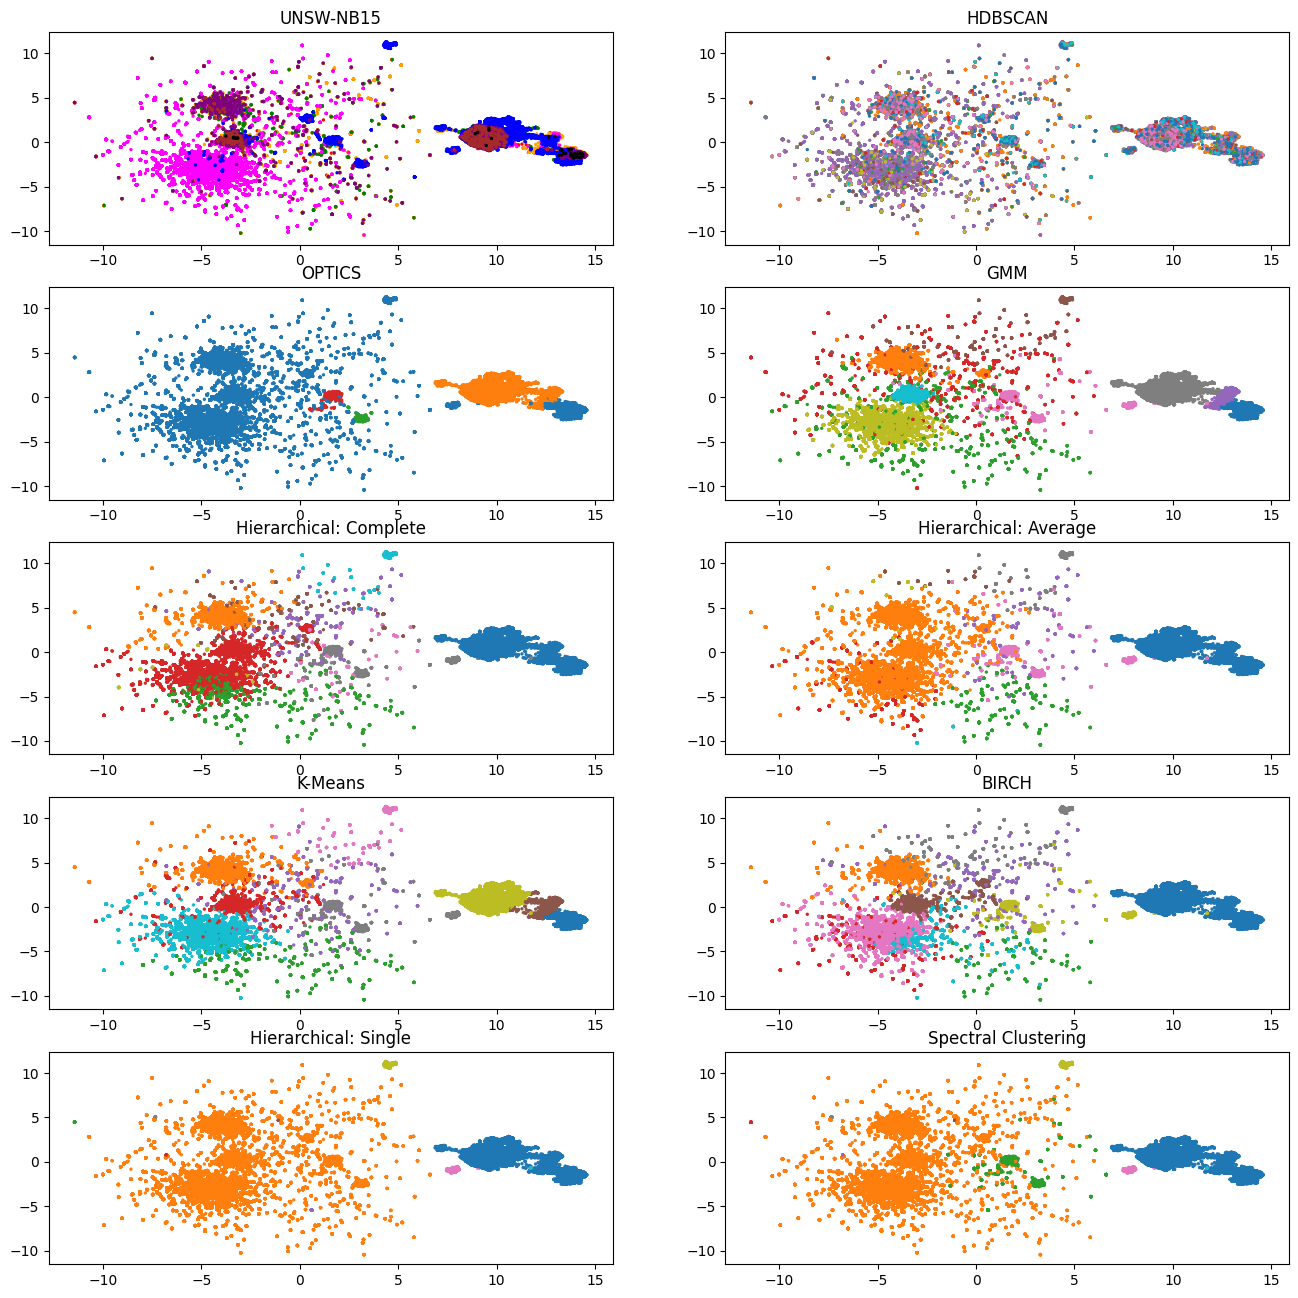

In [43]:

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = plt.subplots(nrows=5, ncols=2, figsize=(16,16))
ax1.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax1.set_title("UNSW-NB15")
ax1.set(xlabel=None)
ax2.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = hdb_75u_colors, alpha=1.0)
ax2.set_title("HDBSCAN")
ax2.set(xlabel=None)
ax3.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = opt_75u_colors, alpha=1.0)
ax3.set_title("OPTICS")
ax3.set(xlabel=None)
ax4.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = gmm_75u_colors, alpha=1.0)
ax4.set_title("GMM")
ax4.set(xlabel=None)
ax5.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = cmpl_75u_colors, alpha=1.0)
ax5.set_title("Hierarchical: Complete")
ax5.set(xlabel=None)
ax6.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = avg_75u_colors, alpha=1.0)
ax6.set_title("Hierarchical: Average")
ax6.set(xlabel=None)
ax7.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = km_75u_colors, alpha=1.0)
ax7.set_title("K-Means")
ax7.set(xlabel=None)
ax8.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = bir_75u_colors, alpha=1.0)
ax8.set_title("BIRCH")
ax8.set(xlabel=None)
ax9.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = sing_75u_colors, alpha=1.0)
ax9.set_title("Hierarchical: Single")
ax10.scatter(x  = unsw_uMap75['umap1'], y = unsw_uMap75['umap2'], s= 2, c = spec_75u_colors, alpha=1.0)
ax10.set_title("Spectral Clustering")

# produce a legend with the unique colors from the scatter
#legend1 = ax1.legend(handles = handles, loc="upper left", title="Attack Category")
#ax1.add_artist(legend1)

### UNSW-NB15 3D Outputs

Text(0.5, 0.92, 'Spectral')

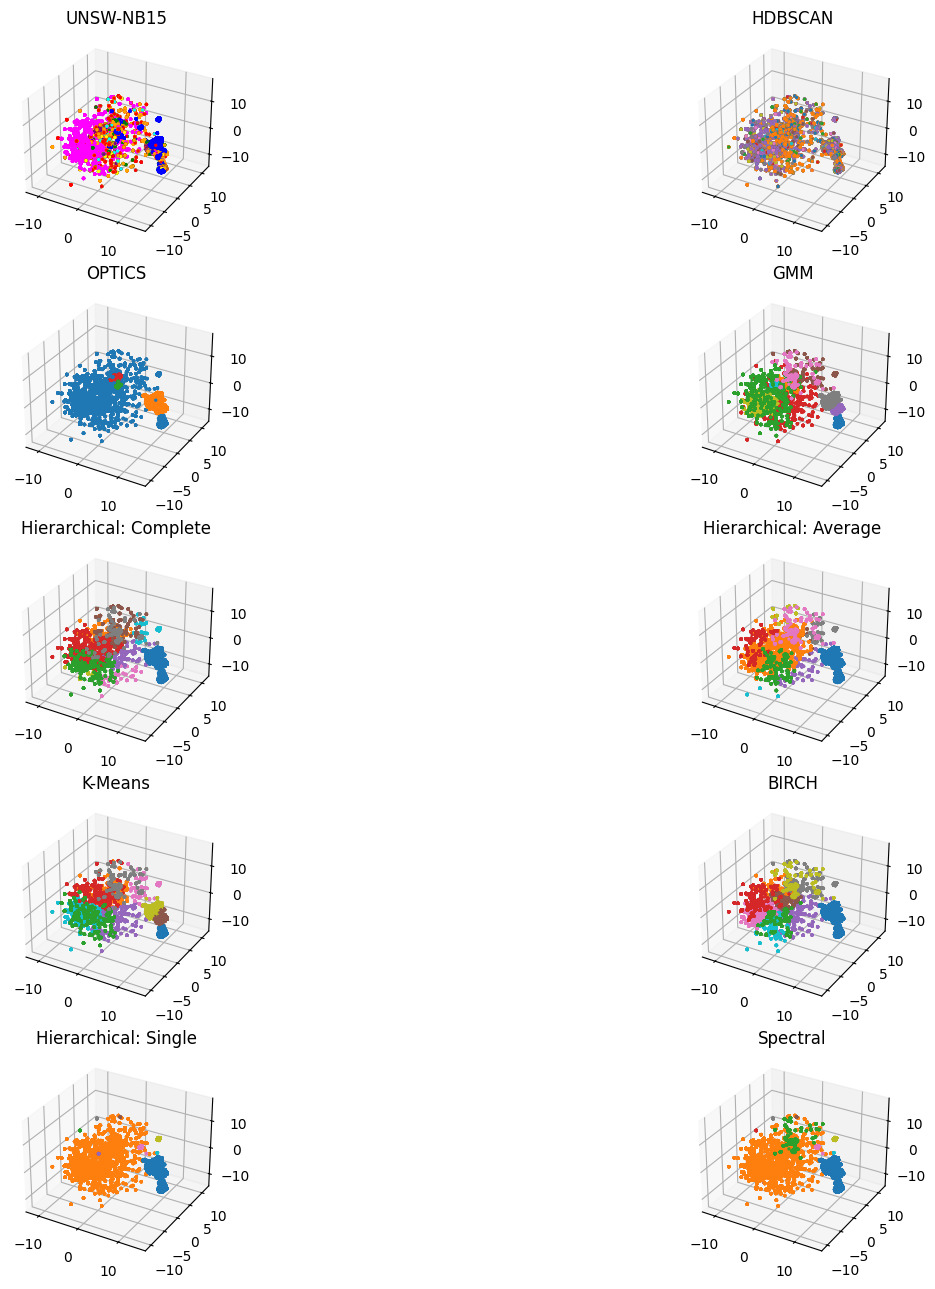

In [44]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = plt.subplots(nrows=5, ncols=2, figsize=(16,16), subplot_kw=dict(projection='3d'))
ax1.scatter(xs  = unsw_uMap75['umap1'], ys = unsw_uMap75['umap2'], zs = unsw_uMap75['umap3'], s= 2, c = pd.factorize(unsw75['attack_cat'], sort = True)[0], cmap = unsw_cmap, alpha=1.0)
ax1.set_title("UNSW-NB15")
ax2.scatter(xs = unsw_uMap75['umap1'], ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = hdb_75u_colors, alpha=1.0)
ax2.set_title("HDBSCAN")
ax3.scatter(xs = unsw_uMap75['umap1'],ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = opt_75u_colors, alpha=1.0)
ax3.set_title("OPTICS")
ax4.scatter(xs = unsw_uMap75['umap1'],ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = gmm_75u_colors, alpha=1.0)
ax4.set_title("GMM")
ax5.scatter(xs = unsw_uMap75['umap1'],ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = cmpl_75u_colors, alpha=1.0)
ax5.set_title("Hierarchical: Complete")
ax6.scatter(xs = unsw_uMap75['umap1'],ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = avg_75u_colors, alpha=1.0)
ax6.set_title("Hierarchical: Average")
ax7.scatter(xs = unsw_uMap75['umap1'],ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = km_75u_colors, alpha=1.0)
ax7.set_title("K-Means")
ax8.scatter(xs = unsw_uMap75['umap1'],ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = bir_75u_colors, alpha=1.0)
ax8.set_title("BIRCH")
ax9.scatter(xs = unsw_uMap75['umap1'],ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = sing_75u_colors, alpha=1.0)
ax9.set_title("Hierarchical: Single")
ax10.scatter(xs = unsw_uMap75['umap1'],ys = unsw_uMap75['umap2'], zs =  unsw_uMap75['umap3'], s= 2, c = spec_75u_colors, alpha=1.0)
ax10.set_title("Spectral")

# produce a legend with the unique colors from the scatter
#legend1 = ax6.legend(handles = handles, loc="center", title="Attack Category")
#ax6.add_artist(legend1)

### Cluster Evaluation

In [45]:
print("NSL KDD Clustering \t\t n_samples %d, \t n_features %d" % (unsw_uMap75.shape[0], unsw_uMap75.shape[1]))
print(85 * '_')
print("\t Internal Evaluation Metrics \t External Evaluation Metrics")
print(85 * '_')
print("\t\t    " f"{'Silh':<10}{'CHI':<10}   {'DBI':<10}{'ARI':<10}{'AMI':<10}{'Compl':<10}")
print(85 * '_')
cluster_evaluation(name = "k-means \t", labels = unsw75['attack_cat'], y_pred = unsw_kmeans_uMap75['Cluster ID Kmeans'], data = unsw_uMap75, metric = 'euclidean')
cluster_evaluation(name = "GMM        \t", labels = unsw75['attack_cat'], y_pred = unsw_gmm_uMap75['Cluster ID GMM'], data = unsw_uMap75, metric = 'euclidean')
cluster_evaluation(name = "Single \t\t", labels = unsw75['attack_cat'], y_pred = unsw_single_uMap75['Cluster ID Single'], data = unsw_uMap75, metric = 'euclidean')
# Single ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
cluster_evaluation(name = "Average\t\t", labels = unsw75['attack_cat'], y_pred = unsw_avg_uMap75['Cluster ID avg'], data = unsw_uMap75, metric = 'euclidean')
cluster_evaluation(name = "Complete\t", labels = unsw75['attack_cat'], y_pred = unsw_cmpl_uMap75['Cluster ID compl'], data = unsw_uMap75, metric = 'euclidean')
cluster_evaluation(name = "Spectral\t", labels = unsw75['attack_cat'], y_pred = unsw_spec_uMap75['Cluster ID SPC'], data = unsw_uMap75, metric = 'euclidean')
cluster_evaluation(name = "HDBSCAN\t\t", labels = unsw75['attack_cat'], y_pred = unsw_hdb_uMap75['Cluster ID HDBSCAN'], data = unsw_uMap75, metric = 'euclidean')
cluster_evaluation(name = "OPTICS\t\t", labels = unsw75['attack_cat'], y_pred = unsw_opt_uMap75['Cluster ID OPTICS'], data = unsw_uMap75, metric = 'euclidean')
cluster_evaluation(name = "BIRCH  \t\t", labels = unsw75['attack_cat'], y_pred = unsw_bir_uMap75['Cluster ID Birch'], data = unsw_uMap75, metric = 'euclidean')
print(85 * '_')
print("silh - silhouette score, CHI - Callinski score, DBI - David Bouldin score")
print("sARI - adjusted rand score, AMI - adjusted mutual information, Compl - completeness_score")
print()
print("Interpretation")
print("silh [-1,1] - -1 mislabelling, 0 cluster overlap, 1 perfect score")
print("CHI no upper bound - higher score, better-defined clusters")
print("DBI - lower score better cluster separation")
print("ARI [0,1] - 1 means identical clusters, predicted and actual are the same")
print("AMI [0,1] - higher values better performance")
print("completeness_score [0,1] - 1 perfect labeling")

NSL KDD Clustering 		 n_samples 75000, 	 n_features 3
_____________________________________________________________________________________
	 Internal Evaluation Metrics 	 External Evaluation Metrics
_____________________________________________________________________________________
		    Silh      CHI          DBI       ARI       AMI       Compl     
_____________________________________________________________________________________
k-means 	    0.525  102668.935     0.810     0.263     0.306     0.280
GMM        	    0.507   78692.931     1.198     0.264     0.326     0.294
Single 		    0.436   17827.229     0.482     0.133     0.168     0.259
Average		    0.502   37553.482     0.853     0.177     0.216     0.258
Complete	    0.473   50782.802     1.082     0.205     0.255     0.266
Spectral	    0.537   29157.781     0.444     0.182     0.228     0.304
HDBSCAN		   -0.169     168.442    64.179     0.167     0.254     0.235
OPTICS		    0.283   16681.203     0.907     0.093     0.17